# External modules

In [26]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)

# Internal functions

In [27]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


In [28]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [31]:
data <- xfun::in_dir(dir = path, expr = read_csv("./04_experimentation_02/merged_data.csv"))
#data <- xfun::in_dir(dir = path, expr = read.csv("./04_experimentation_03/localization_errors.csv", sep =";"))

Rows: 35082 Columns: 52
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): file
dbl (51): timestamp, latitude, longitude, lateral_error, longitudinal_error,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
str(data)

spc_tbl_ [35,082 × 52] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp            : num [1:35082] 1.77e+09 1.77e+09 1.77e+09 1.77e+09 1.77e+09 ...
 $ latitude             : num [1:35082] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude            : num [1:35082] 2.46 2.46 2.46 2.46 2.46 ...
 $ lateral_error        : num [1:35082] 2.61 2.61 2.58 2.6 2.63 ...
 $ longitudinal_error   : num [1:35082] -0.0285 -0.0317 -0.0294 -0.0266 -0.026 ...
 $ latitude_error       : num [1:35082] 8.23e-06 8.08e-06 8.38e-06 8.21e-06 8.31e-06 ...
 $ longitude_error      : num [1:35082] -3.42e-05 -3.34e-05 -3.48e-05 -3.41e-05 -3.45e-05 ...
 $ velocity_latitude    : num [1:35082] 2.48e-11 1.84e-11 2.44e-11 1.96e-11 1.81e-11 ...
 $ velocity_longitude   : num [1:35082] -1.05e-10 -7.80e-11 -1.03e-10 -8.31e-11 -7.67e-11 ...
 $ velocity             : num [1:35082] 1.08e-10 8.01e-11 1.06e-10 8.54e-11 7.88e-11 ...
 $ name_airplane        : num [1:35082] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench           : num [1:35082] 

## Response variable

In [33]:
x_raw <- abs(data$lateral_error)
#x_raw <- abs(data$lateral_error)

In [34]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [35]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

In [36]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [37]:
outlier_positions <- x_raw_object$outlier_positions

In [38]:
print(outlier_positions)

 [1] 23585 23586 23587 23588 23589 23590 23591 23592 23593 23594 23595 23596
[13] 23597 23598 23599 23600 23601 23602 23603 23604 23605 23606 23607 23608
[25] 23609 23610 23611 23612 23613 23614 23615 23616 23617 23618 23619 23620
[37] 23621 23622 23623 23624 23625 23626 23627 23628 23629 23630 23631 23632
[49] 23633 23634 23635 23636 23637 23638 23639 23640 23641 23642 23643 23644
[61] 23645 23646 23647 23648 23649 23650 23651 23671 23672 23673 23674 23675


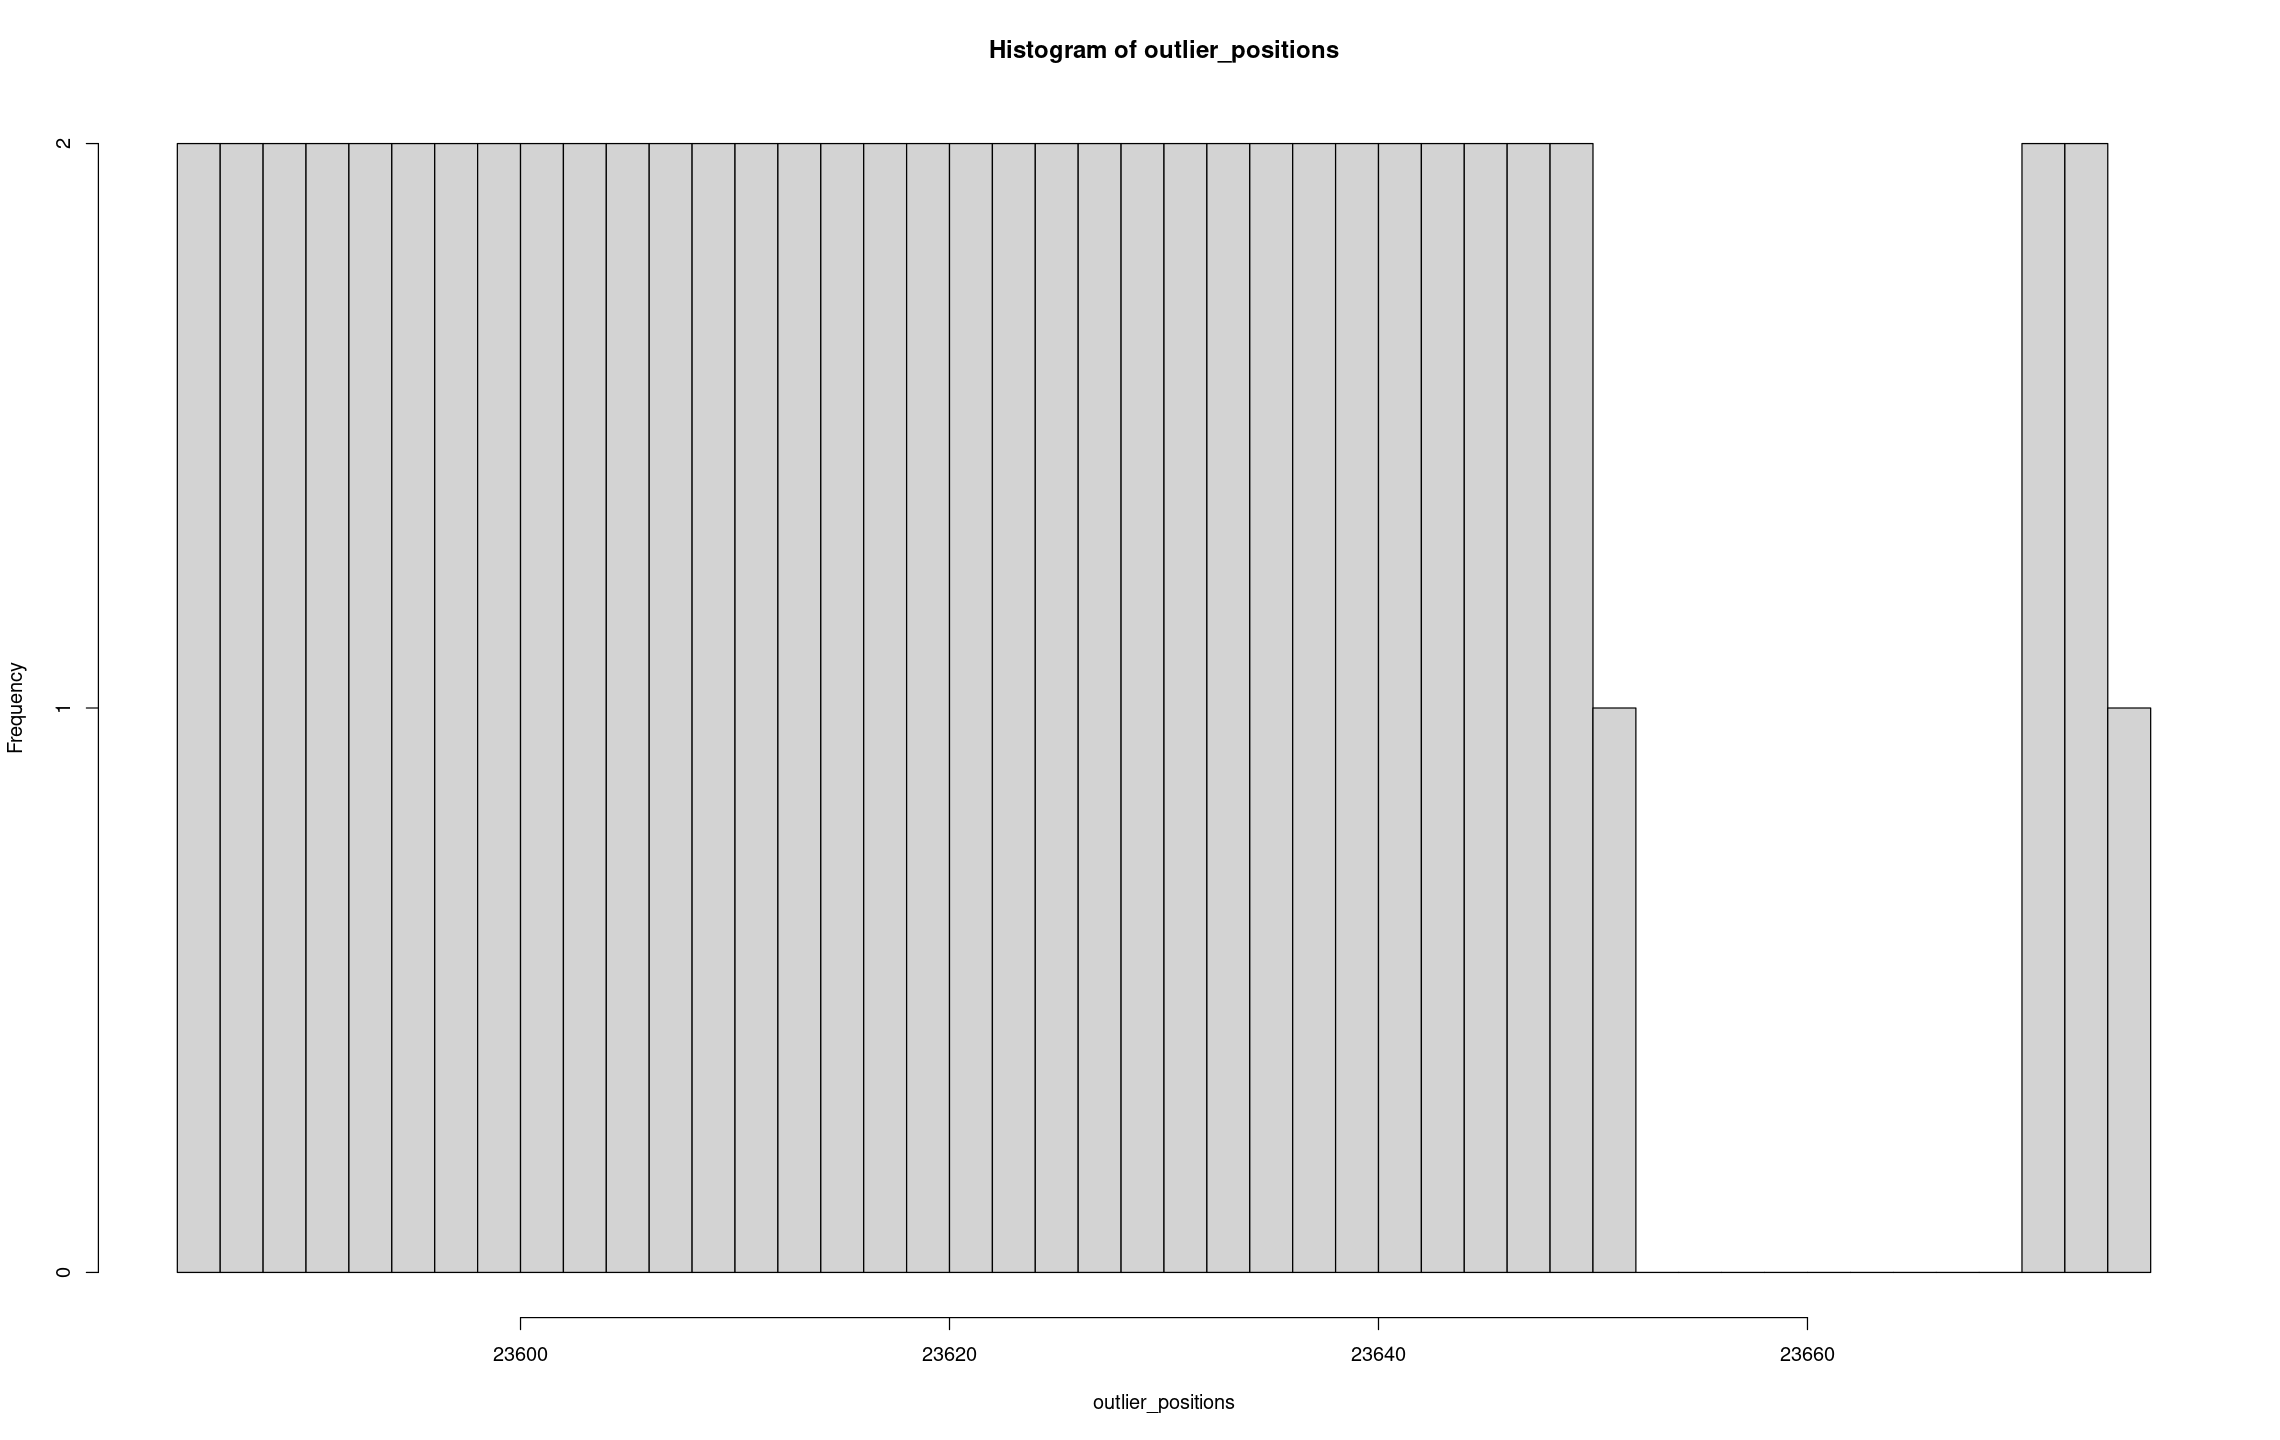

In [39]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

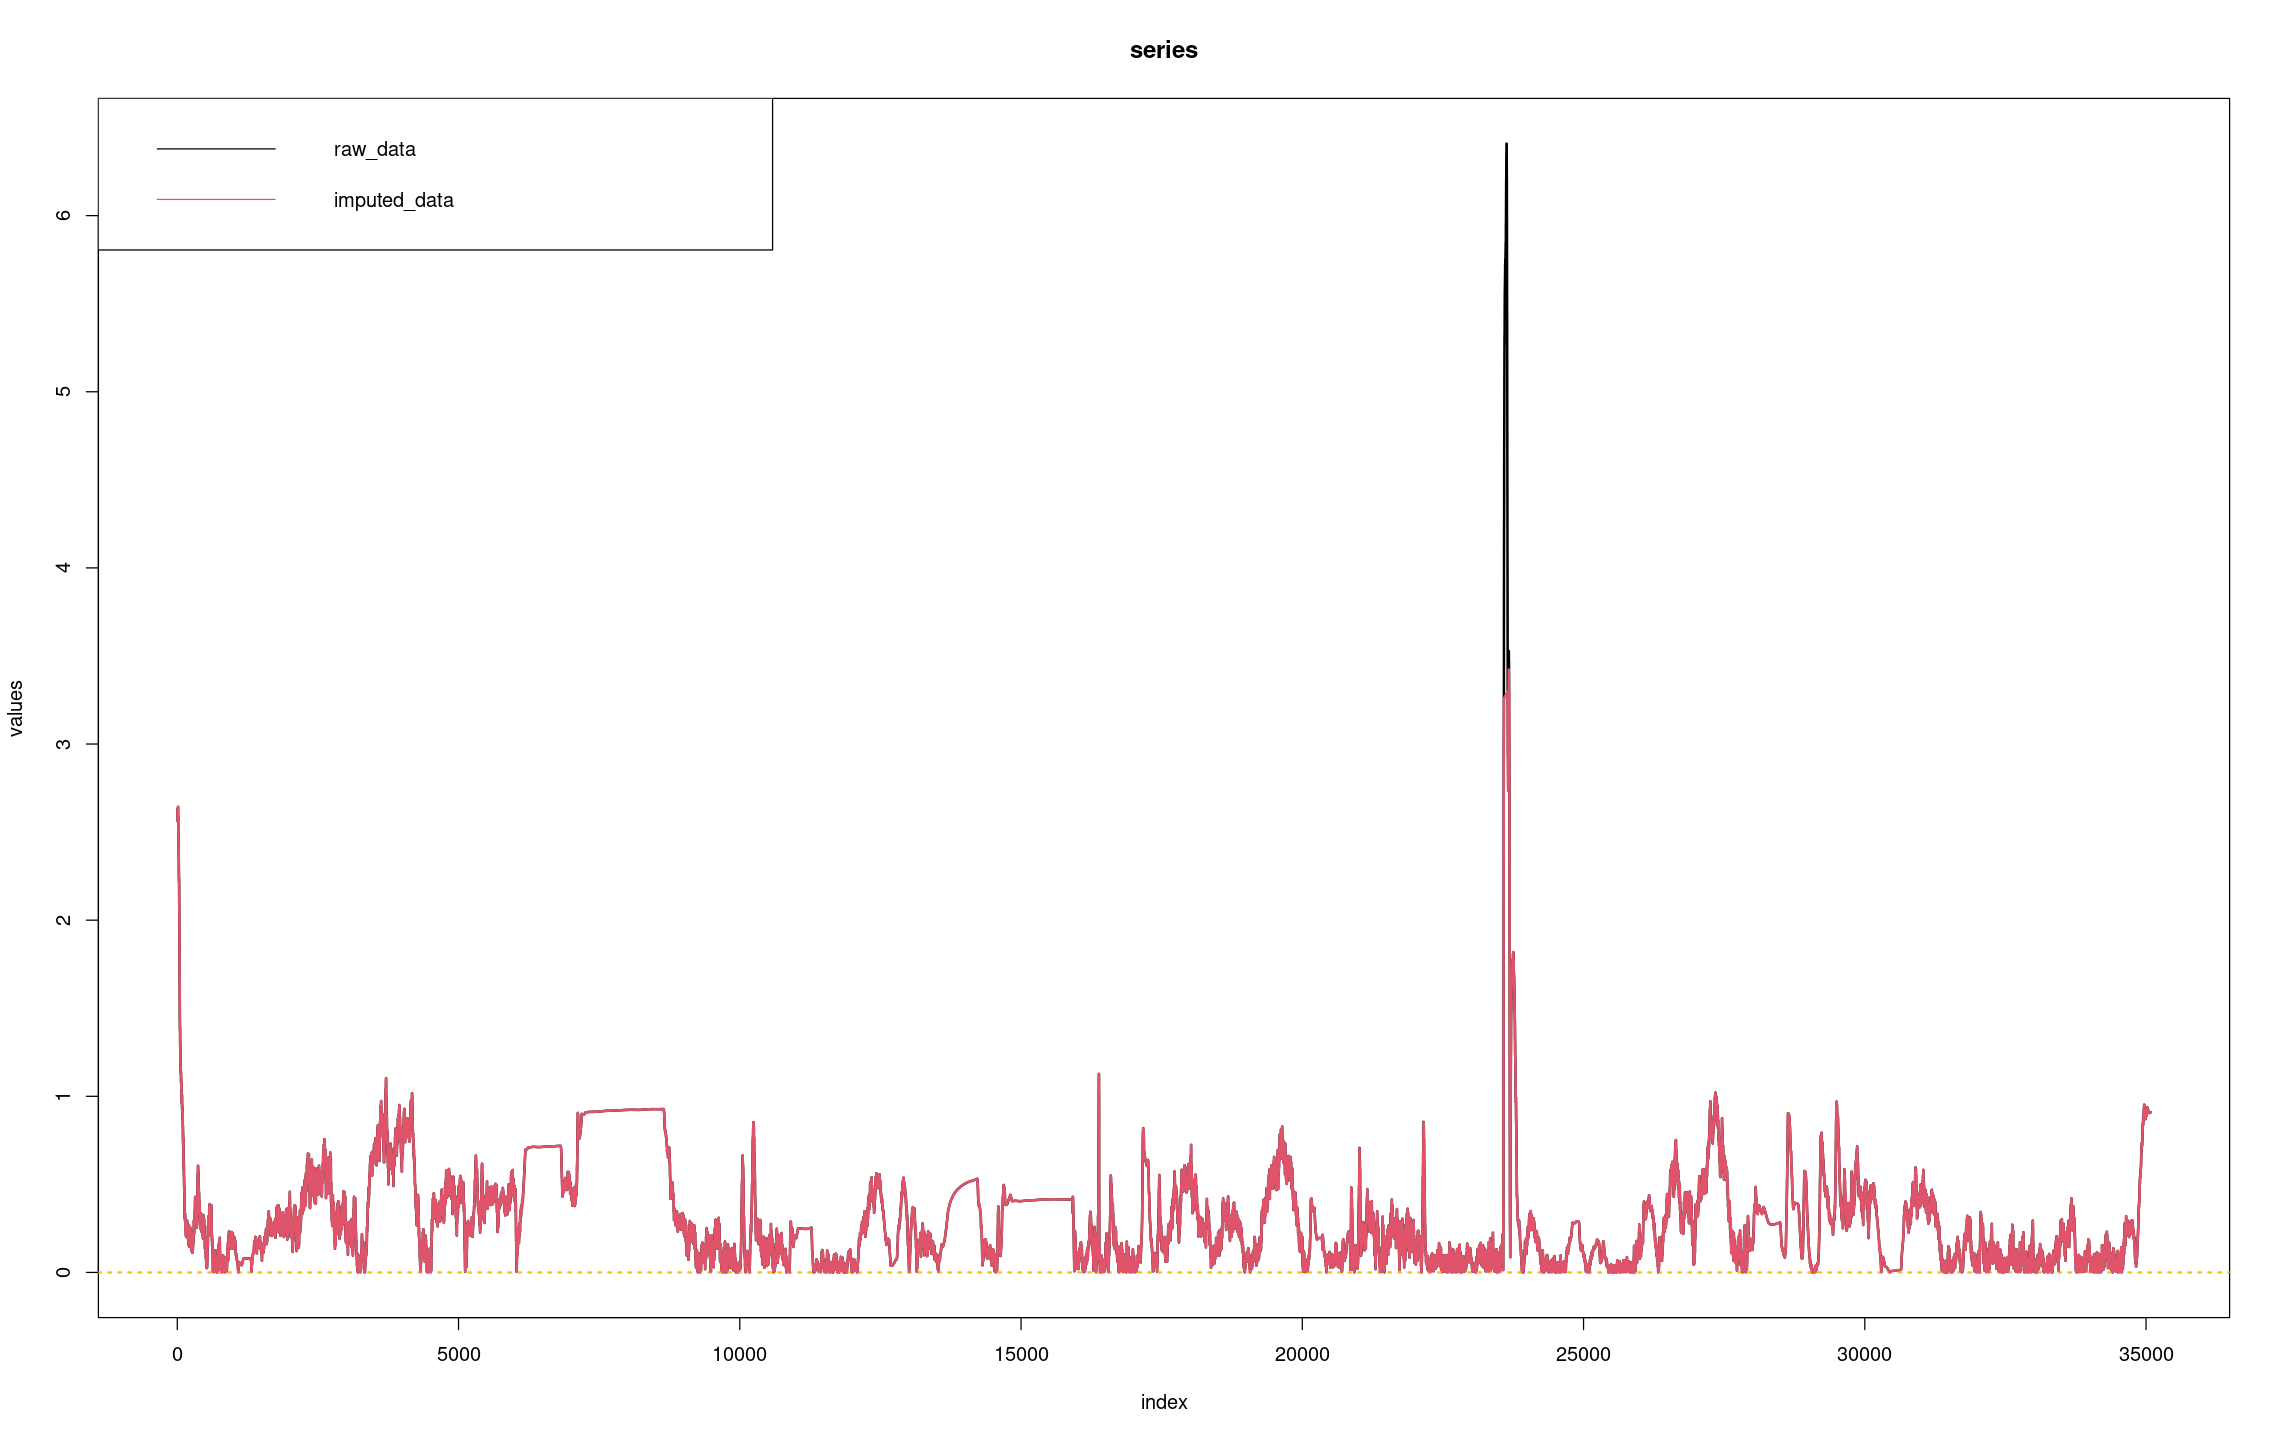

In [40]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [41]:
# data with imputed outliers
x <- x_raw_object$imputed_data 
data_clean <- data
n <- length(x)

In [42]:
# data with removed outliers
# x <- x_raw[-outlier_positions]
# n <- length(x)
# data_clean <- data[-outlier_positions, ]

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           35'082           35'082                0           34'271
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0146462698933  0.0313936393708  0.0880855843424  0.2359583675860
                                                                    
            range               sd            vcoef              mad
  3.4234461620679  0.3117857480570  1.0124624520091  0.2470615222959
                                                                    
               0s             mean            meanCI
                0  0.3079479613672   0.3046852612196
             0.0%                    0.3112106615147
                                                    
    

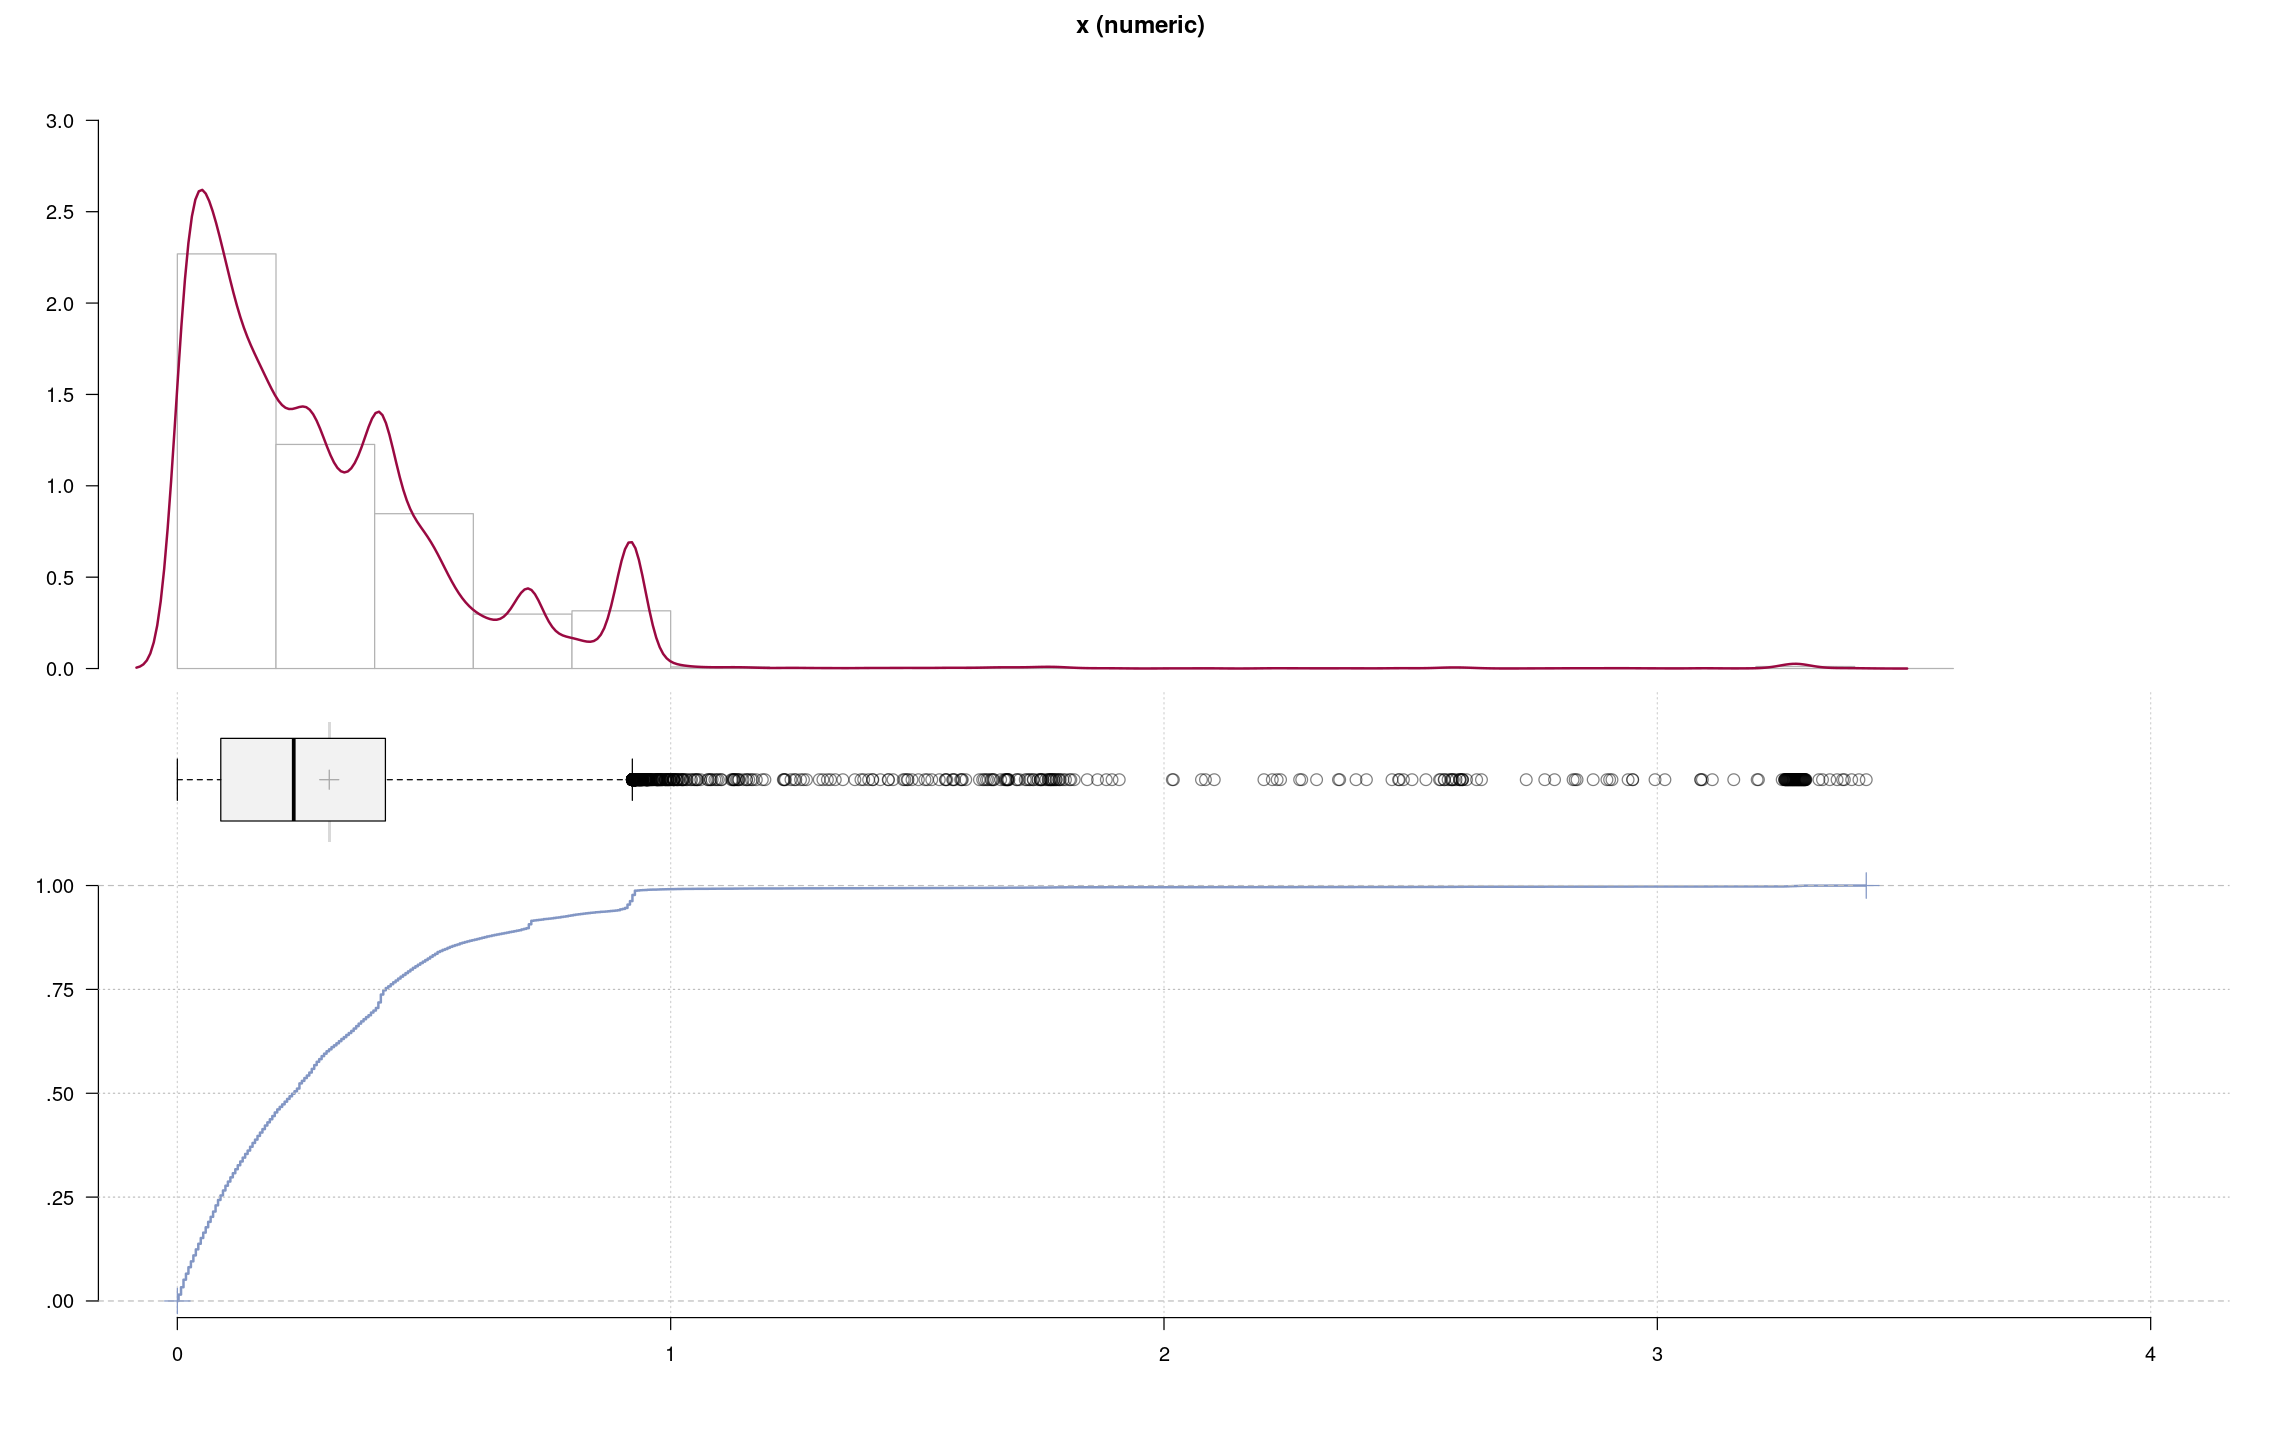

In [43]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [44]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

## Predictor variables

In [45]:
# # select the predictor variables
# data_covariates <- data_clean %>% select(!c(timestamp, latitude, longitude, velocity_latitude, velocity_longitude,
#                                             lateral_error, longitudinal_error, haversine_error, latitude_error,
#                                             longitude_error, heading_error, lateral_error_abs, longitudinal_error_abs,
#                                             haversine_error_abs, latitude_error_abs, longitude_error_abs, heading_error_abs))
# 
# str(data_covariates)

In [46]:
# select the predictor variables
data_covariates <- data_clean %>% select(c(velocity, object, area))

str(data_covariates)

tibble [35,082 × 3] (S3: tbl_df/tbl/data.frame)
 $ velocity: num [1:35082] 1.08e-10 8.01e-11 1.06e-10 8.54e-11 7.88e-11 ...
 $ object  : num [1:35082] 34 31 34 31 34 33 35 33 36 41 ...
 $ area    : num [1:35082] 0.537 0.483 0.575 0.57 0.598 ...


In [47]:
# Remove columns containing only zeros
# data_covariates_clean <- data_covariates %>% select(where(~ sum(.) != 0))
data_covariates_clean <- data_covariates %>% select_if(colSums(.) != 0)

str(data_covariates_clean)

tibble [35,082 × 3] (S3: tbl_df/tbl/data.frame)
 $ velocity: num [1:35082] 1.08e-10 8.01e-11 1.06e-10 8.54e-11 7.88e-11 ...
 $ object  : num [1:35082] 34 31 34 31 34 33 35 33 36 41 ...
 $ area    : num [1:35082] 0.537 0.483 0.575 0.57 0.598 ...


In [48]:
# describe(data_covariates_clean)

In [49]:
# scale all predictors variables

data_covariates_clean_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = NULL)

str(data_covariates_clean_scaled)

'data.frame':	35082 obs. of  3 variables:
 $ velocity: num  0.984 0.384 0.951 0.497 0.356 ...
 $ object  : num  -0.199 -0.432 -0.199 -0.432 -0.199 ...
 $ area    : num  -0.553 -0.631 -0.498 -0.506 -0.465 ...


# Model selection

## Candidate block sizes

In [50]:
minimum_block_size <- find_minimum_block_size(x, threshold = min(x))

print(minimum_block_size)

[1] 3


In [51]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 701


In [52]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 0.001251884853


In [53]:
print(median(x))

[1] 0.2359583676


In [54]:
print(calculate_mode(x))

[1] 0.05057775163


In [55]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = min(x), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Hyperparameters

In [60]:
use.phi <- TRUE
nlargest <- 10000
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(x)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

## Candidate models

In [57]:


models_object <- c(list("model_01" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_02" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        
                        "model_04" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_05" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_07" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_08" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_09" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_10" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_12" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),

                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_14" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_15" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),

                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_19" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_20" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_21" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_23" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_25" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_26" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_27" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~object),

                        
                        "model_29" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_30" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_31" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_33" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        "model_34" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~velocity),
                       
                       
                        "model_35" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_36" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_37" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_40" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~object),
                       
                       
                        "model_41" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~velocity),
                        "model_42" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        
                        "model_43" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_44" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~object),
                        
                        "model_45" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_46" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~object)))



In [31]:
# models_object

## Estimations

In [32]:
defaultW <- getOption("warn") 

options(warn = -1) 


fitted_models_object <- lapply(models_object, function(model){
    try({
        ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                        data = data_covariates_clean_scaled,
                                                                        location.fun = model$location.fun,
                                                                        scale.fun = model$scale.fun,
                                                                        shape.fun = model$shape.fun,
                                                                        use.phi = use.phi,
                                                                        nlargest = nlargest,
                                                                        block_sizes = block_sizes,
                                                                        minimum_nblocks = minimum_nblocks,
                                                                        threshold = threshold,
                                                                        confidence_level = confidence_level,
                                                                        use_extremal_index = use_extremal_index,
                                                                        use_uniform_prior = use_uniform_prior,
                                                                        method = method)

        model_vector <- as.character(model)
        names(model_vector) <- c("location.fun", "scale.fun", "shape.fun")

        information_criteria <- ns_gev_mixture_model_object$information_criteria

        c(model_vector, information_criteria)
    },
        silent = TRUE)

})


options(warn = defaultW)

In [33]:
success <- sapply(fitted_models_object, function(x) !inherits(x, "try-error"))

success

model_01 model_02 model_03 model_04 model_05 model_06 model_07 model_08 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_09 model_10 model_11 model_12 model_13 model_14 model_15 model_16 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_17 model_18 model_19 model_20 model_21 model_22 model_23 model_24 
    TRUE     TRUE     TRUE     TRUE    FALSE     TRUE     TRUE     TRUE 
model_25 model_26 model_27 model_28 model_29 model_30 model_31 model_32 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_33 model_34 model_35 model_36 model_37 model_38 model_39 model_40 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_41 model_42 model_43 model_44 model_45 model_46 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

In [34]:
table(success)

success
FALSE  TRUE 
    1    45 

In [35]:
fitted_models_object_success <- fitted_models_object[success]

fitted_models_object_success_df <- do.call(rbind, fitted_models_object_success)

fitted_models_object_success_df <- data.frame("model_names" = rownames(fitted_models_object_success_df),
                                             fitted_models_object_success_df)

rownames(fitted_models_object_success_df) <- 1:nrow(fitted_models_object_success_df)

fitted_models_object_success_df

,model_names,location.fun,scale.fun,shape.fun,AIC,BIC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,model_01,~object,~1,~1,20012.1586032268,21289.9670841075
2,model_02,~1,~object,~1,24377.6166276336,25775.9730784088
3,model_03,~1,~1,~object,27800.9592157932,29480.5942629887
4,model_04,~area,~1,~1,21477.5245073929,22996.4289280624
5,model_05,~1,~area,~1,27179.5284491756,28899.3461530025
6,model_06,~1,~1,~area,25941.8184216997,27782.184095421
7,model_07,~velocity,~1,~1,16128.0833820646,17446.0745195768
8,model_08,~1,~velocity,~1,25898.0157006886,27617.8334045155
9,model_09,~1,~1,~velocity,29808.7743389538,31207.1307897289


In [36]:

# write.csv(x = fitted_models_object_success_df, file = "./fitted_models_information.csv", row.names = FALSE)


# Best model

## Identification

In [37]:

fitted_models_information <- xfun::in_dir(dir = path, expr = read.csv(file = "./04_experimentation_02/fitted_models_information.csv", sep = ","))

str(fitted_models_information)


'data.frame':	45 obs. of  6 variables:
 $ model_names : chr  "model_01" "model_02" "model_03" "model_04" ...
 $ location.fun: chr  "~object" "~1" "~1" "~area" ...
 $ scale.fun   : chr  "~1" "~object" "~1" "~1" ...
 $ shape.fun   : chr  "~1" "~1" "~object" "~1" ...
 $ AIC         : num  20012 24378 27801 21478 27180 ...
 $ BIC         : num  21290 25776 29481 22996 28899 ...


In [38]:
fitted_models_information

model_names,location.fun,scale.fun,shape.fun,AIC,BIC
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
model_01,~object,~1,~1,20012.15860,21289.96708
model_02,~1,~object,~1,24377.61663,25775.97308
model_03,~1,~1,~object,27800.95922,29480.59426
model_04,~area,~1,~1,21477.52451,22996.42893
model_05,~1,~area,~1,27179.52845,28899.34615
model_06,~1,~1,~area,25941.81842,27782.18410
model_07,~velocity,~1,~1,16128.08338,17446.07452
model_08,~1,~velocity,~1,25898.01570,27617.83340
model_09,~1,~1,~velocity,29808.77434,31207.13079


In [39]:
rank <- order(fitted_models_information$AIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names,location.fun,scale.fun,shape.fun,AIC,BIC
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
model_07,~velocity,~1,~1,16128.08338,17446.07452
model_22,~1,~1,~1,16494.79540,17097.53525
model_16,~velocity,~velocity,~1,19554.74872,21523.69889
model_17,~velocity,~1,~velocity,19725.32765,22080.03133
model_01,~object,~1,~1,20012.15860,21289.96708
model_04,~area,~1,~1,21477.52451,22996.42893
model_37,~velocity,~object,~1,21669.41170,24216.99213
model_20,~area,~area,~area,22933.43052,25625.66851
model_13,~area,~area,~1,22949.42900,25207.69430


In [58]:
selected_model <- models_object$model_04

selected_model

$location.fun
~area

$scale.fun
~1

$shape.fun
~1


## Estimation

In [68]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                    data = data_covariates_clean_scaled,
                                                                    location.fun = selected_model$location.fun,
                                                                    scale.fun = selected_model$scale.fun,
                                                                    shape.fun = selected_model$shape.fun,
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [69]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [70]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>
9,0.5475959463,-0.02416905069,0.1306473614,0.4156137243
10,0.5504642730,-0.02651283431,0.1312816381,0.4134383726
11,0.5517437985,-0.02409031068,0.1337290672,0.3964093328
14,0.5598228031,-0.02546737397,0.1362252037,0.3706416249
18,0.5654277359,-0.02882109343,0.1391079628,0.3614483407
19,0.5680043805,-0.02834033430,0.1404147227,0.3577957227
23,0.5731591680,-0.02739656055,0.1428921471,0.3307918424
26,0.5786486056,-0.02929561669,0.1455407971,0.3224967262
30,0.5859527085,-0.03543319426,0.1469063438,0.3028425257


In [71]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
9,0.007802340702
10,0.000100030009
11,0.000300090027
14,0.001900570171
18,0.002400720216
19,0.000100030009
23,0.000900270081
26,0.000500150045
30,0.000500150045


In [72]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

196 
 21

In [73]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC       BIC 
-2207.545 -1385.566

## Diagnostic

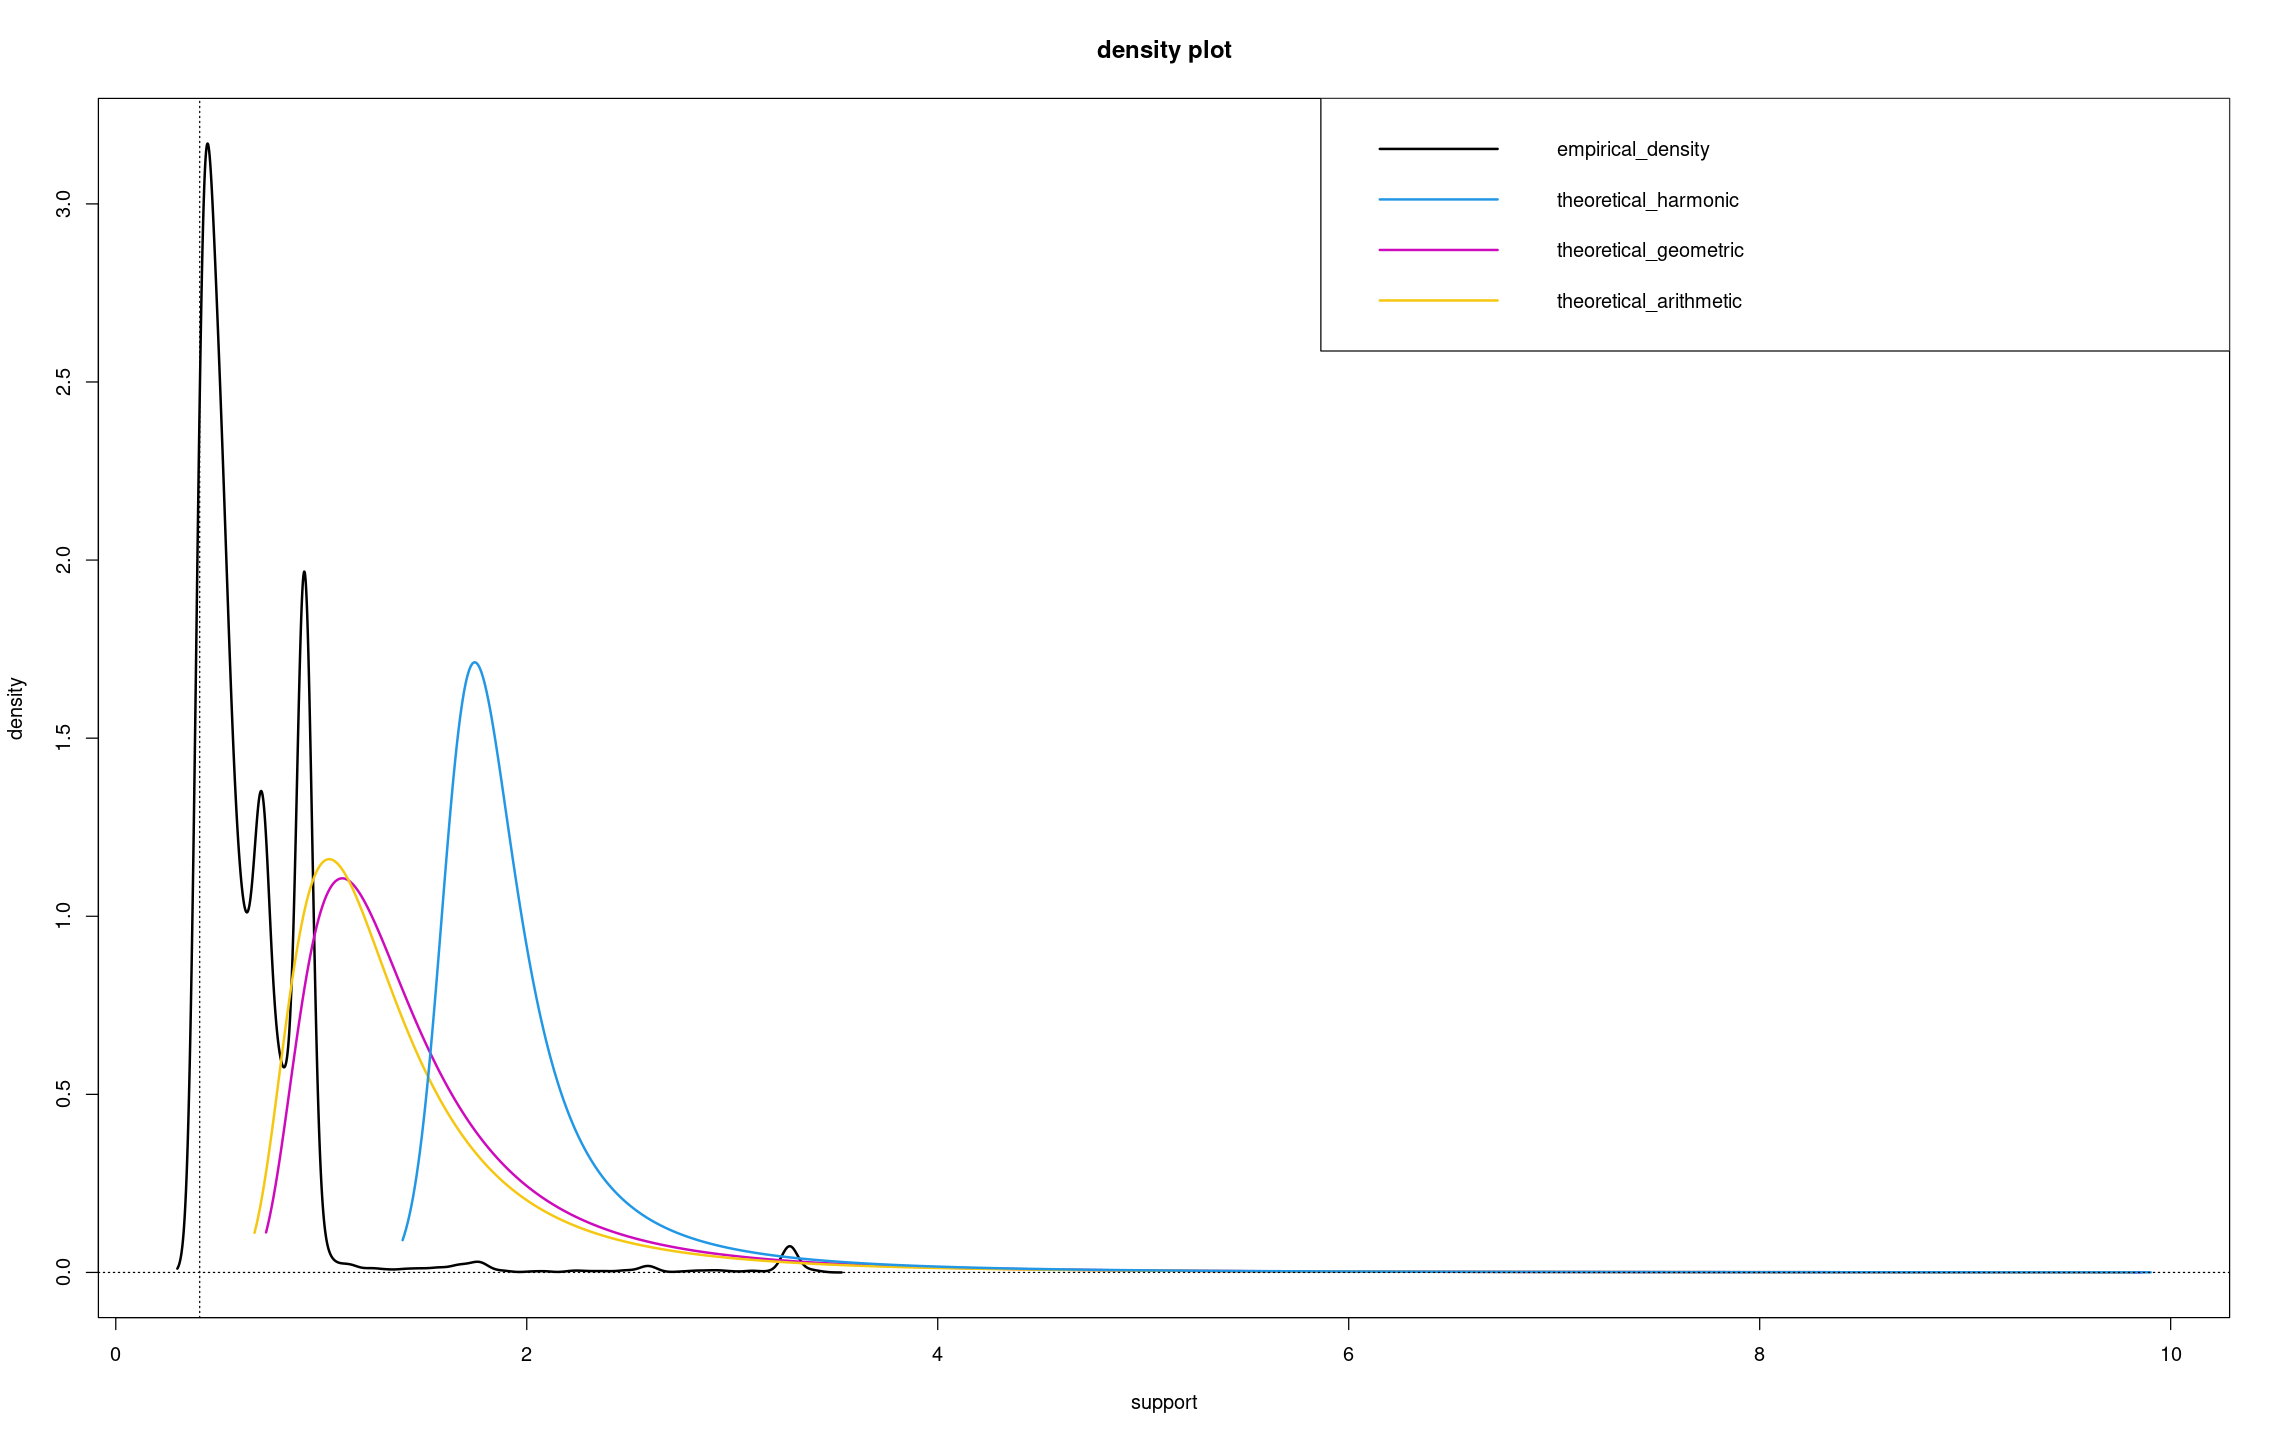

In [74]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

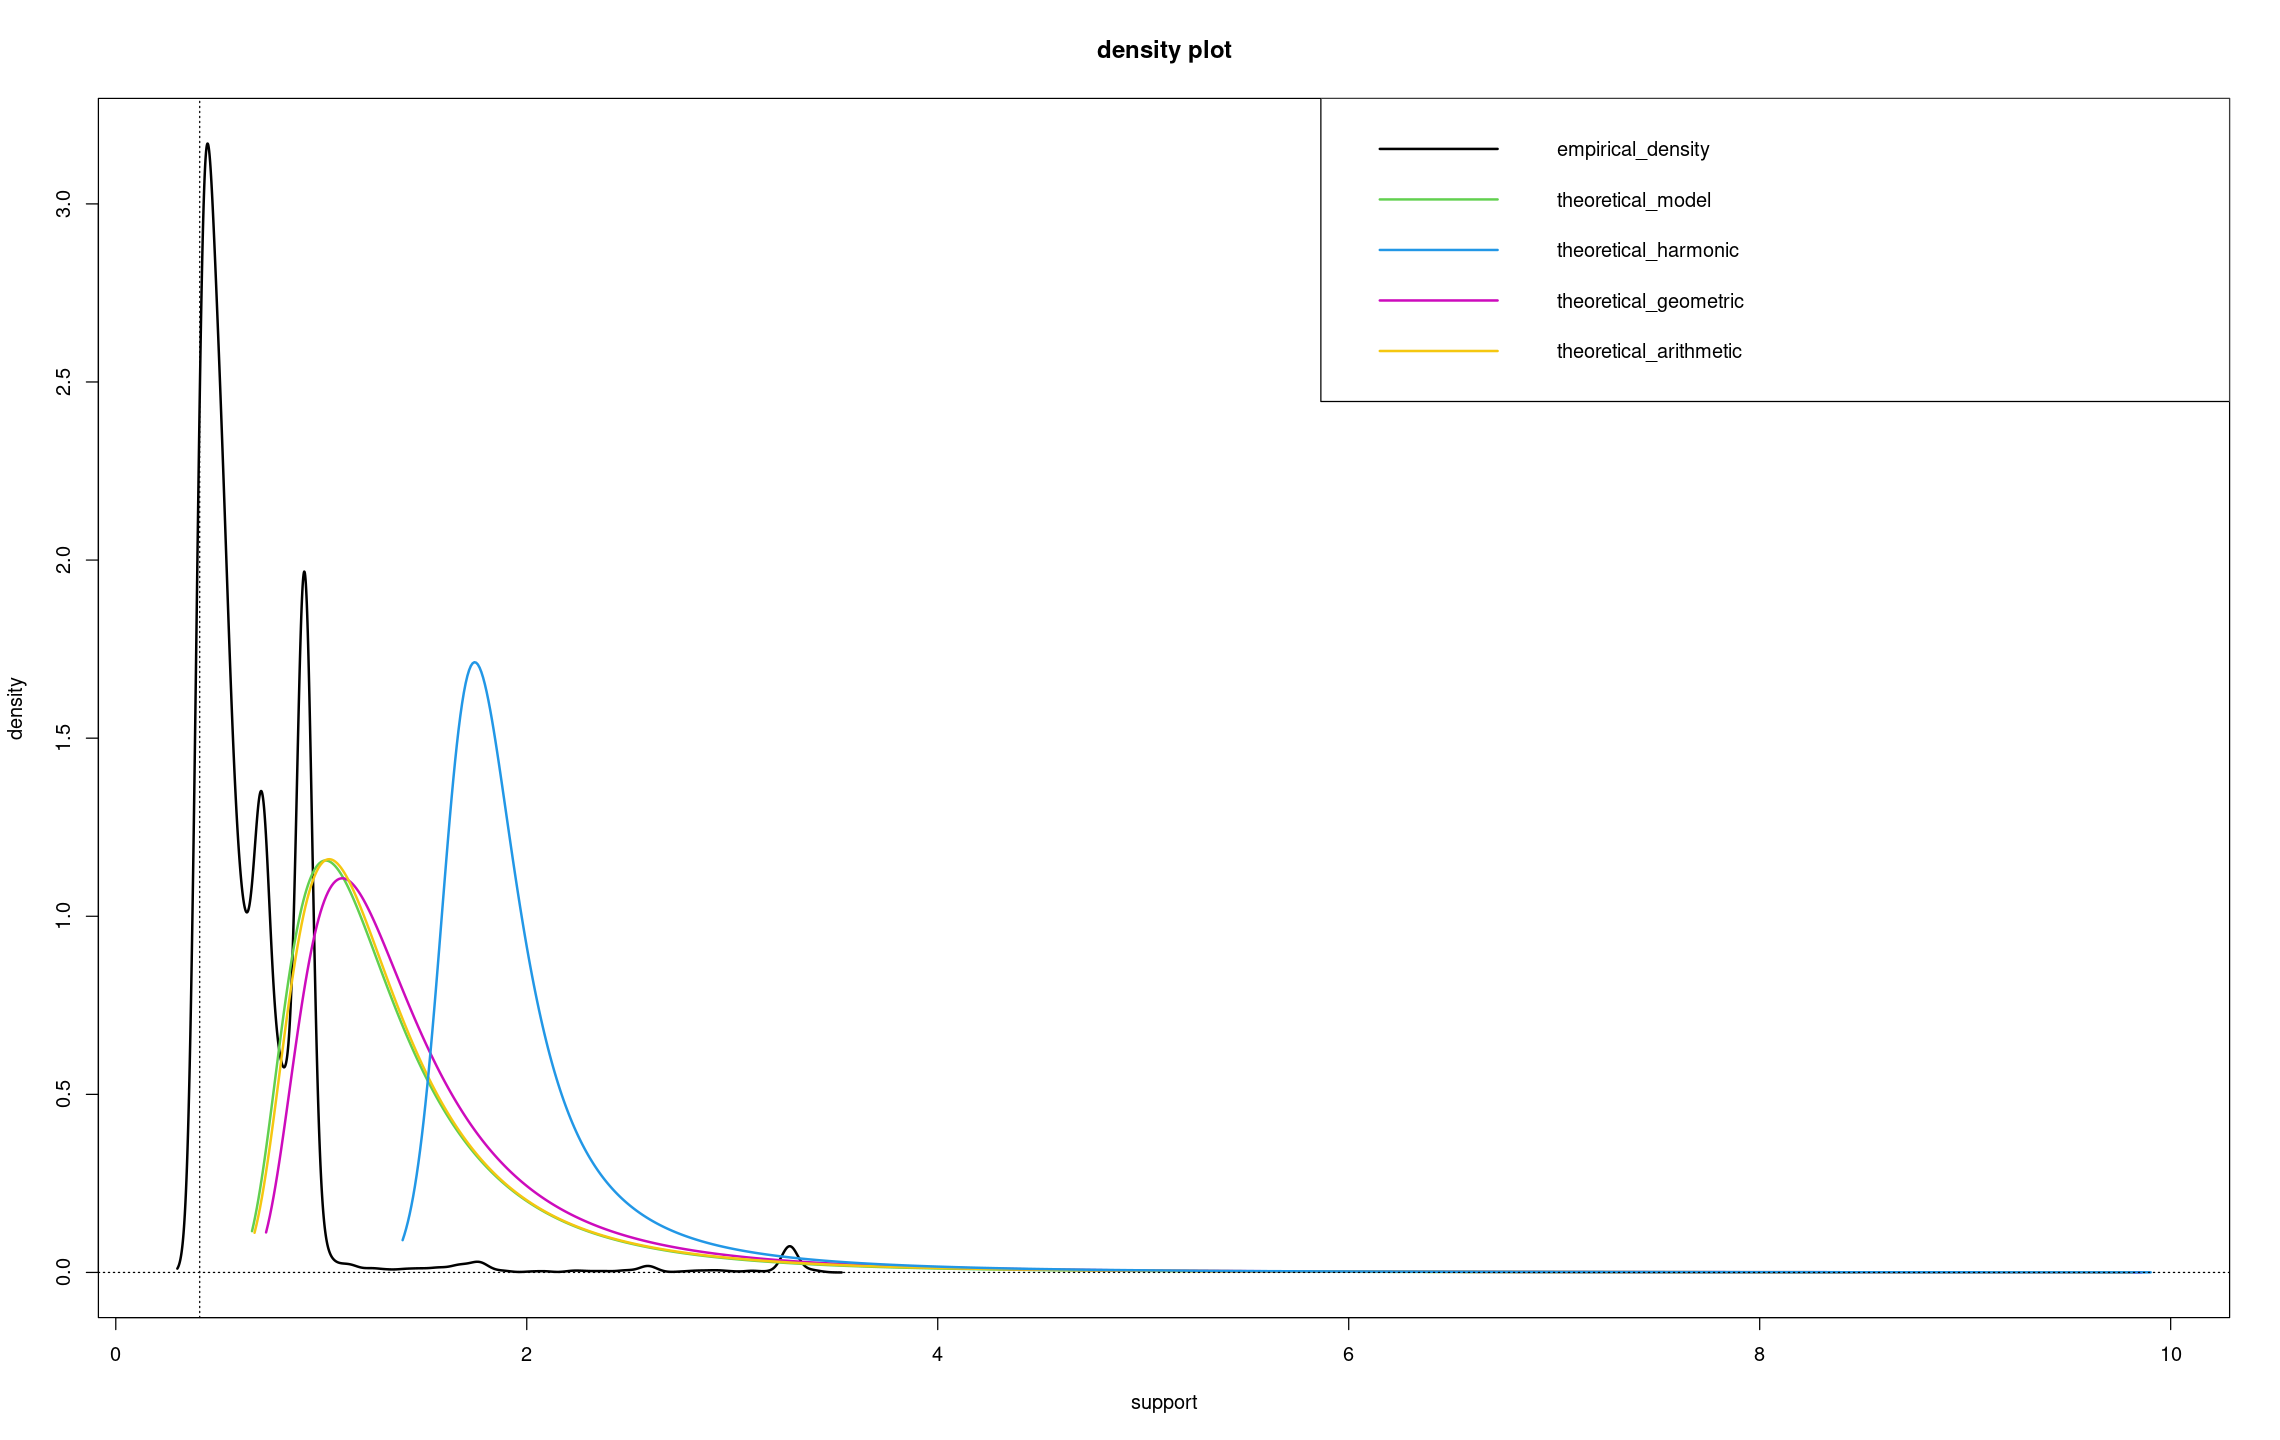

In [75]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

## Quantiles

In [49]:
partial_data <- ns_gev_mixture_model_object$partial_data

threshold <- quantile(partial_data, probs = 0.975)

positions <- partial_data > threshold

partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates[positions, ]

partial_data_observations <- partial_data[positions]

In [50]:
tail(partial_data_covariates)

,velocity,object,area
,<dbl>,<dbl>,<dbl>
19189,0.1306945943,0.6584671331,-0.1391569021
19190,-0.5252809580,0.7476001757,-0.2553886739
19191,1.0590517072,0.6584671331,0.1385118670
19192,0.7230338609,0.5693340906,-0.2757522397
19839,0.6858677656,0.2128019204,3.1928854675
19840,0.1606503458,0.4802010480,3.2910516479


In [51]:
range(partial_data_observations)

[1] 1.507918835 4.976793766

In [52]:
length(partial_data_observations)

[1] 572

### alpha = n^(-1)

In [53]:
alpha <- n^(-1)

print(alpha)

[1] 4.377133853e-05


In [54]:

quantiles_1 <- sapply(1:nrow(partial_data_covariates), function(index){
    new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [55]:
tail(quantiles_1)

[1] 86.23795743 86.22948931 86.19414040 86.22800571 86.03364155 86.04083379

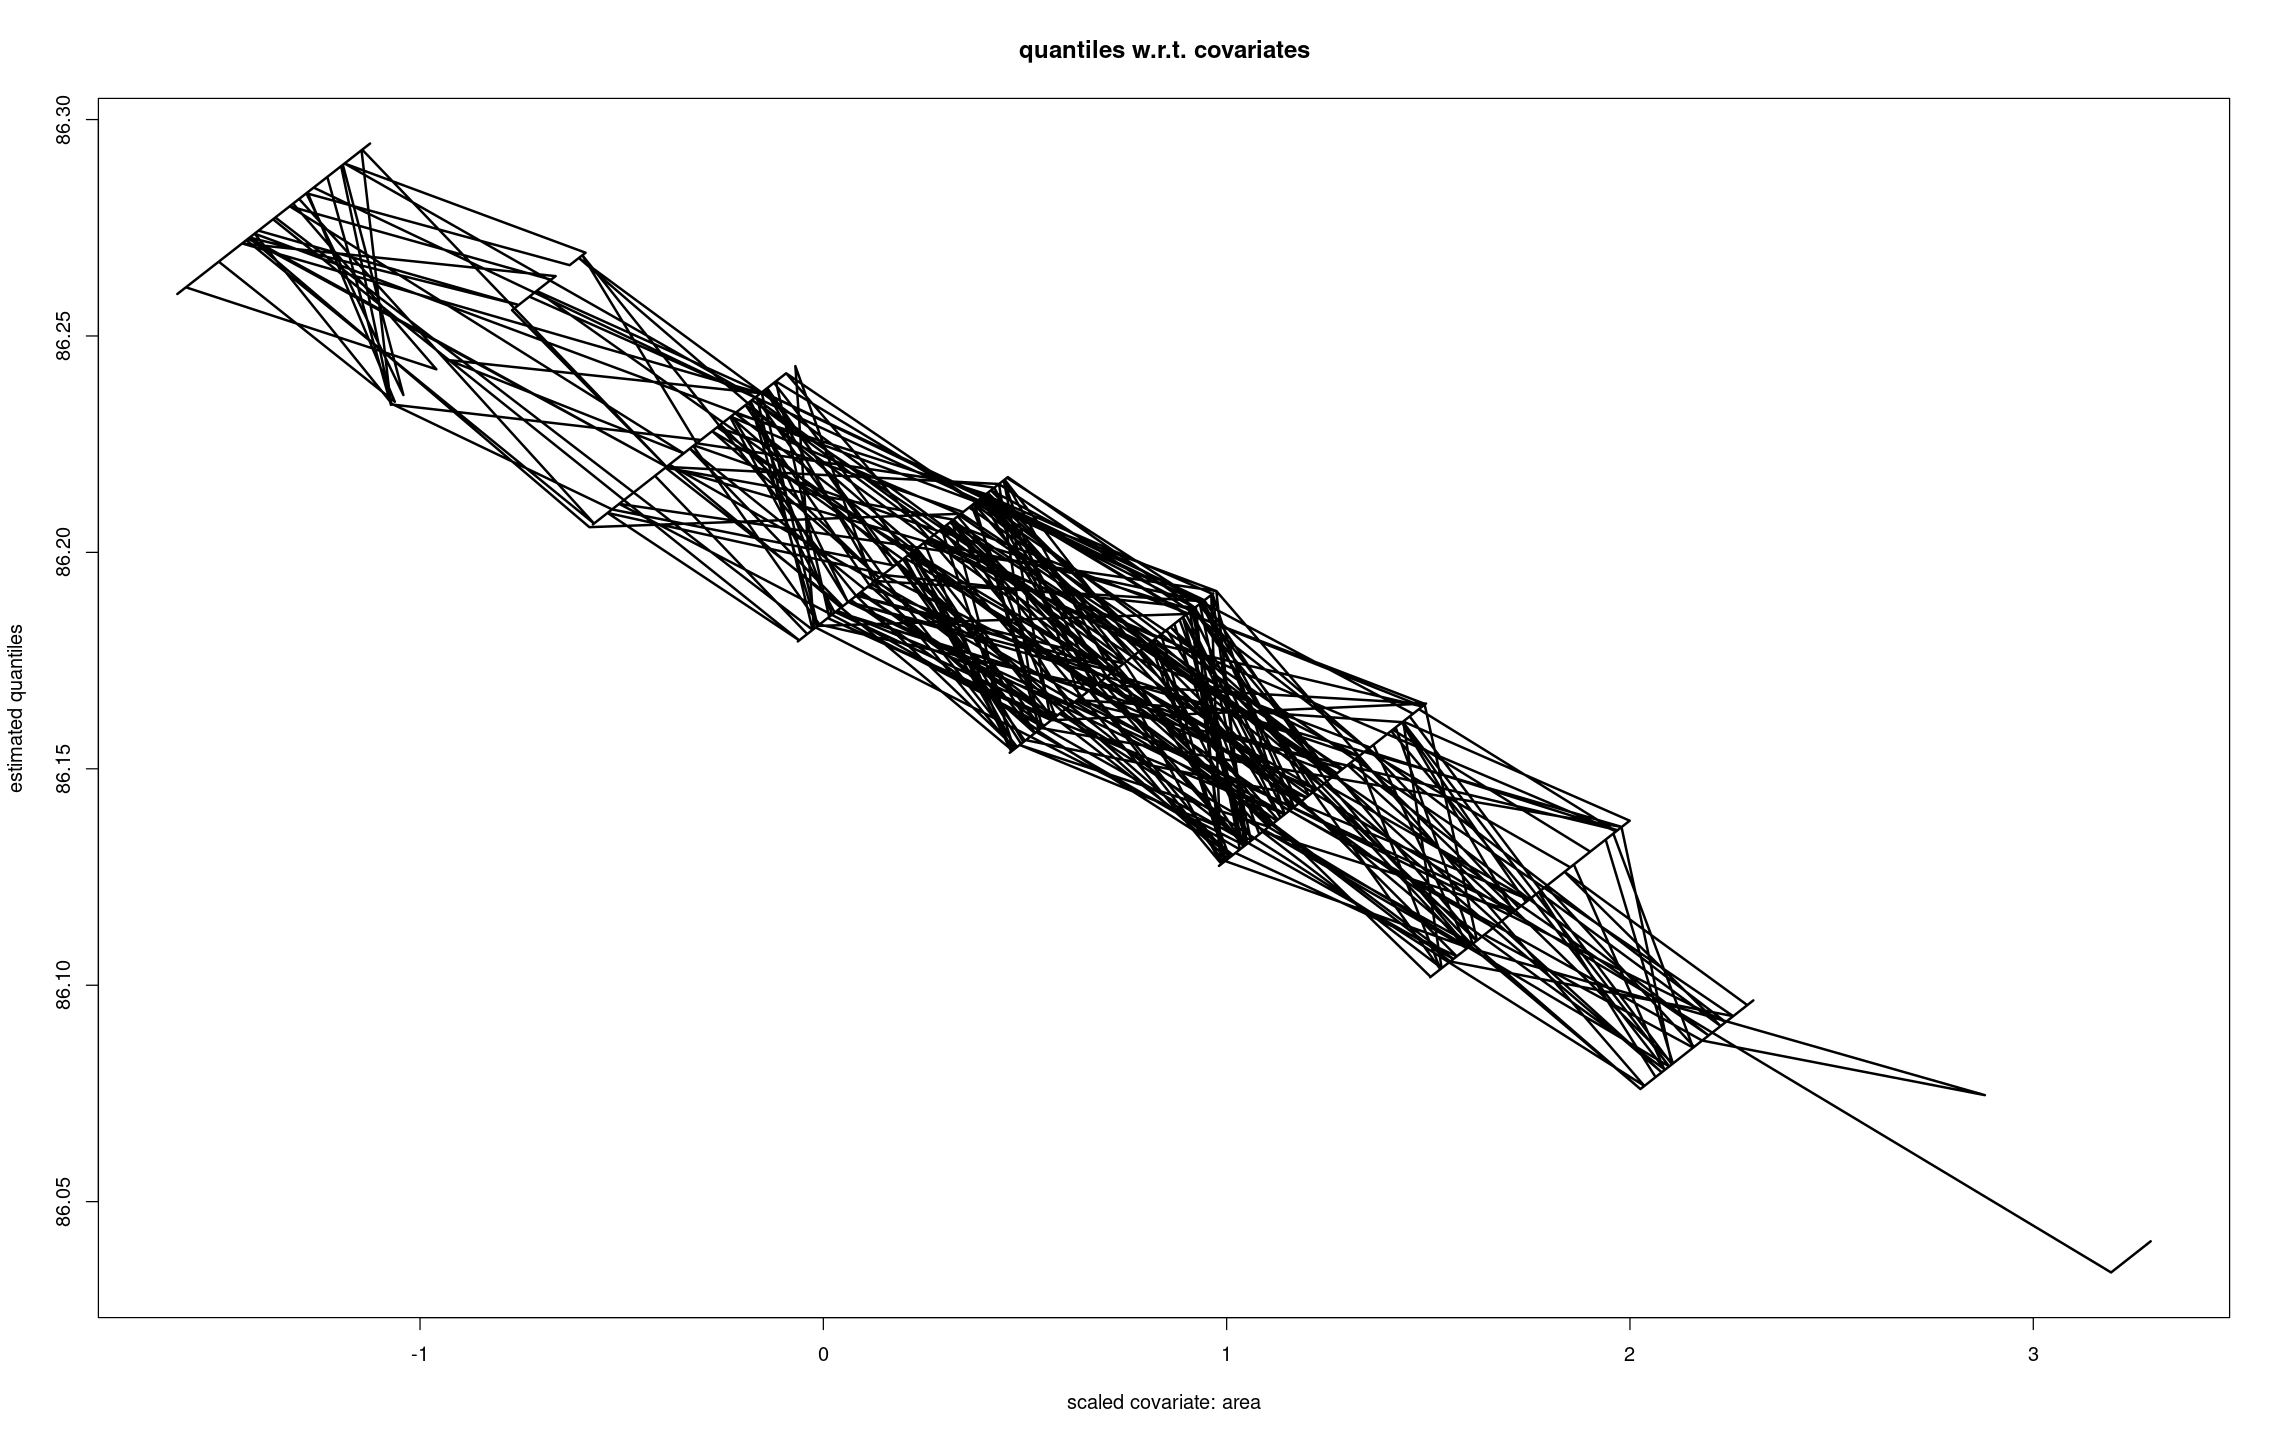

In [56]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_1,
     type = "l",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

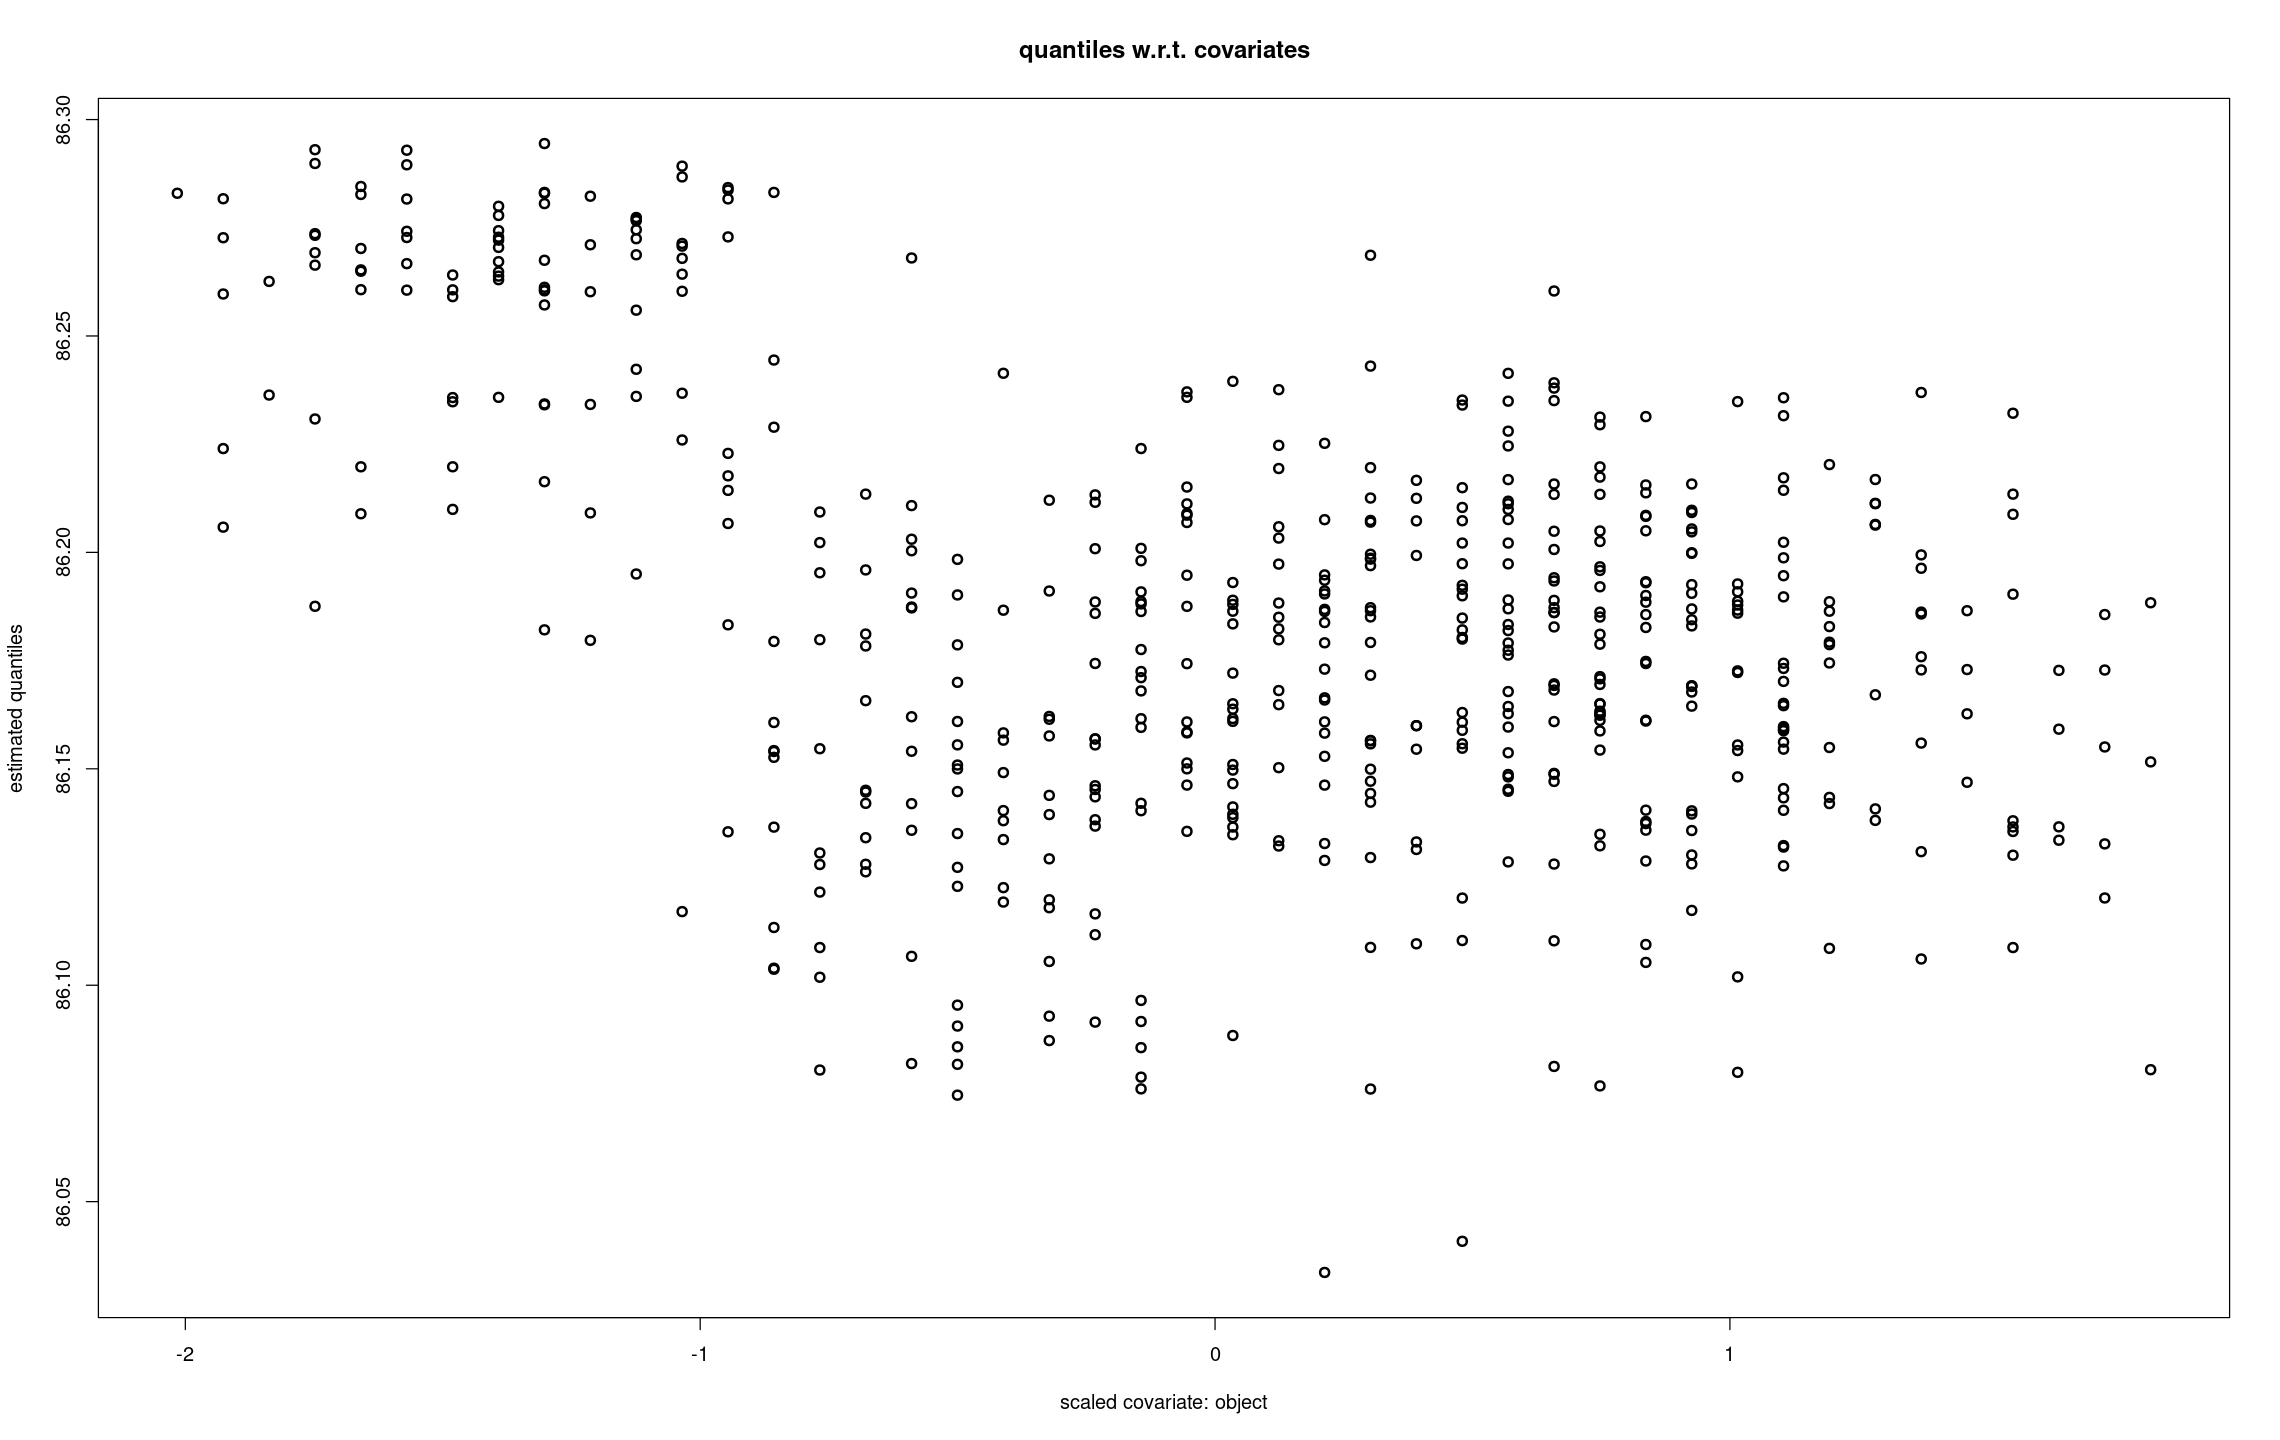

In [57]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

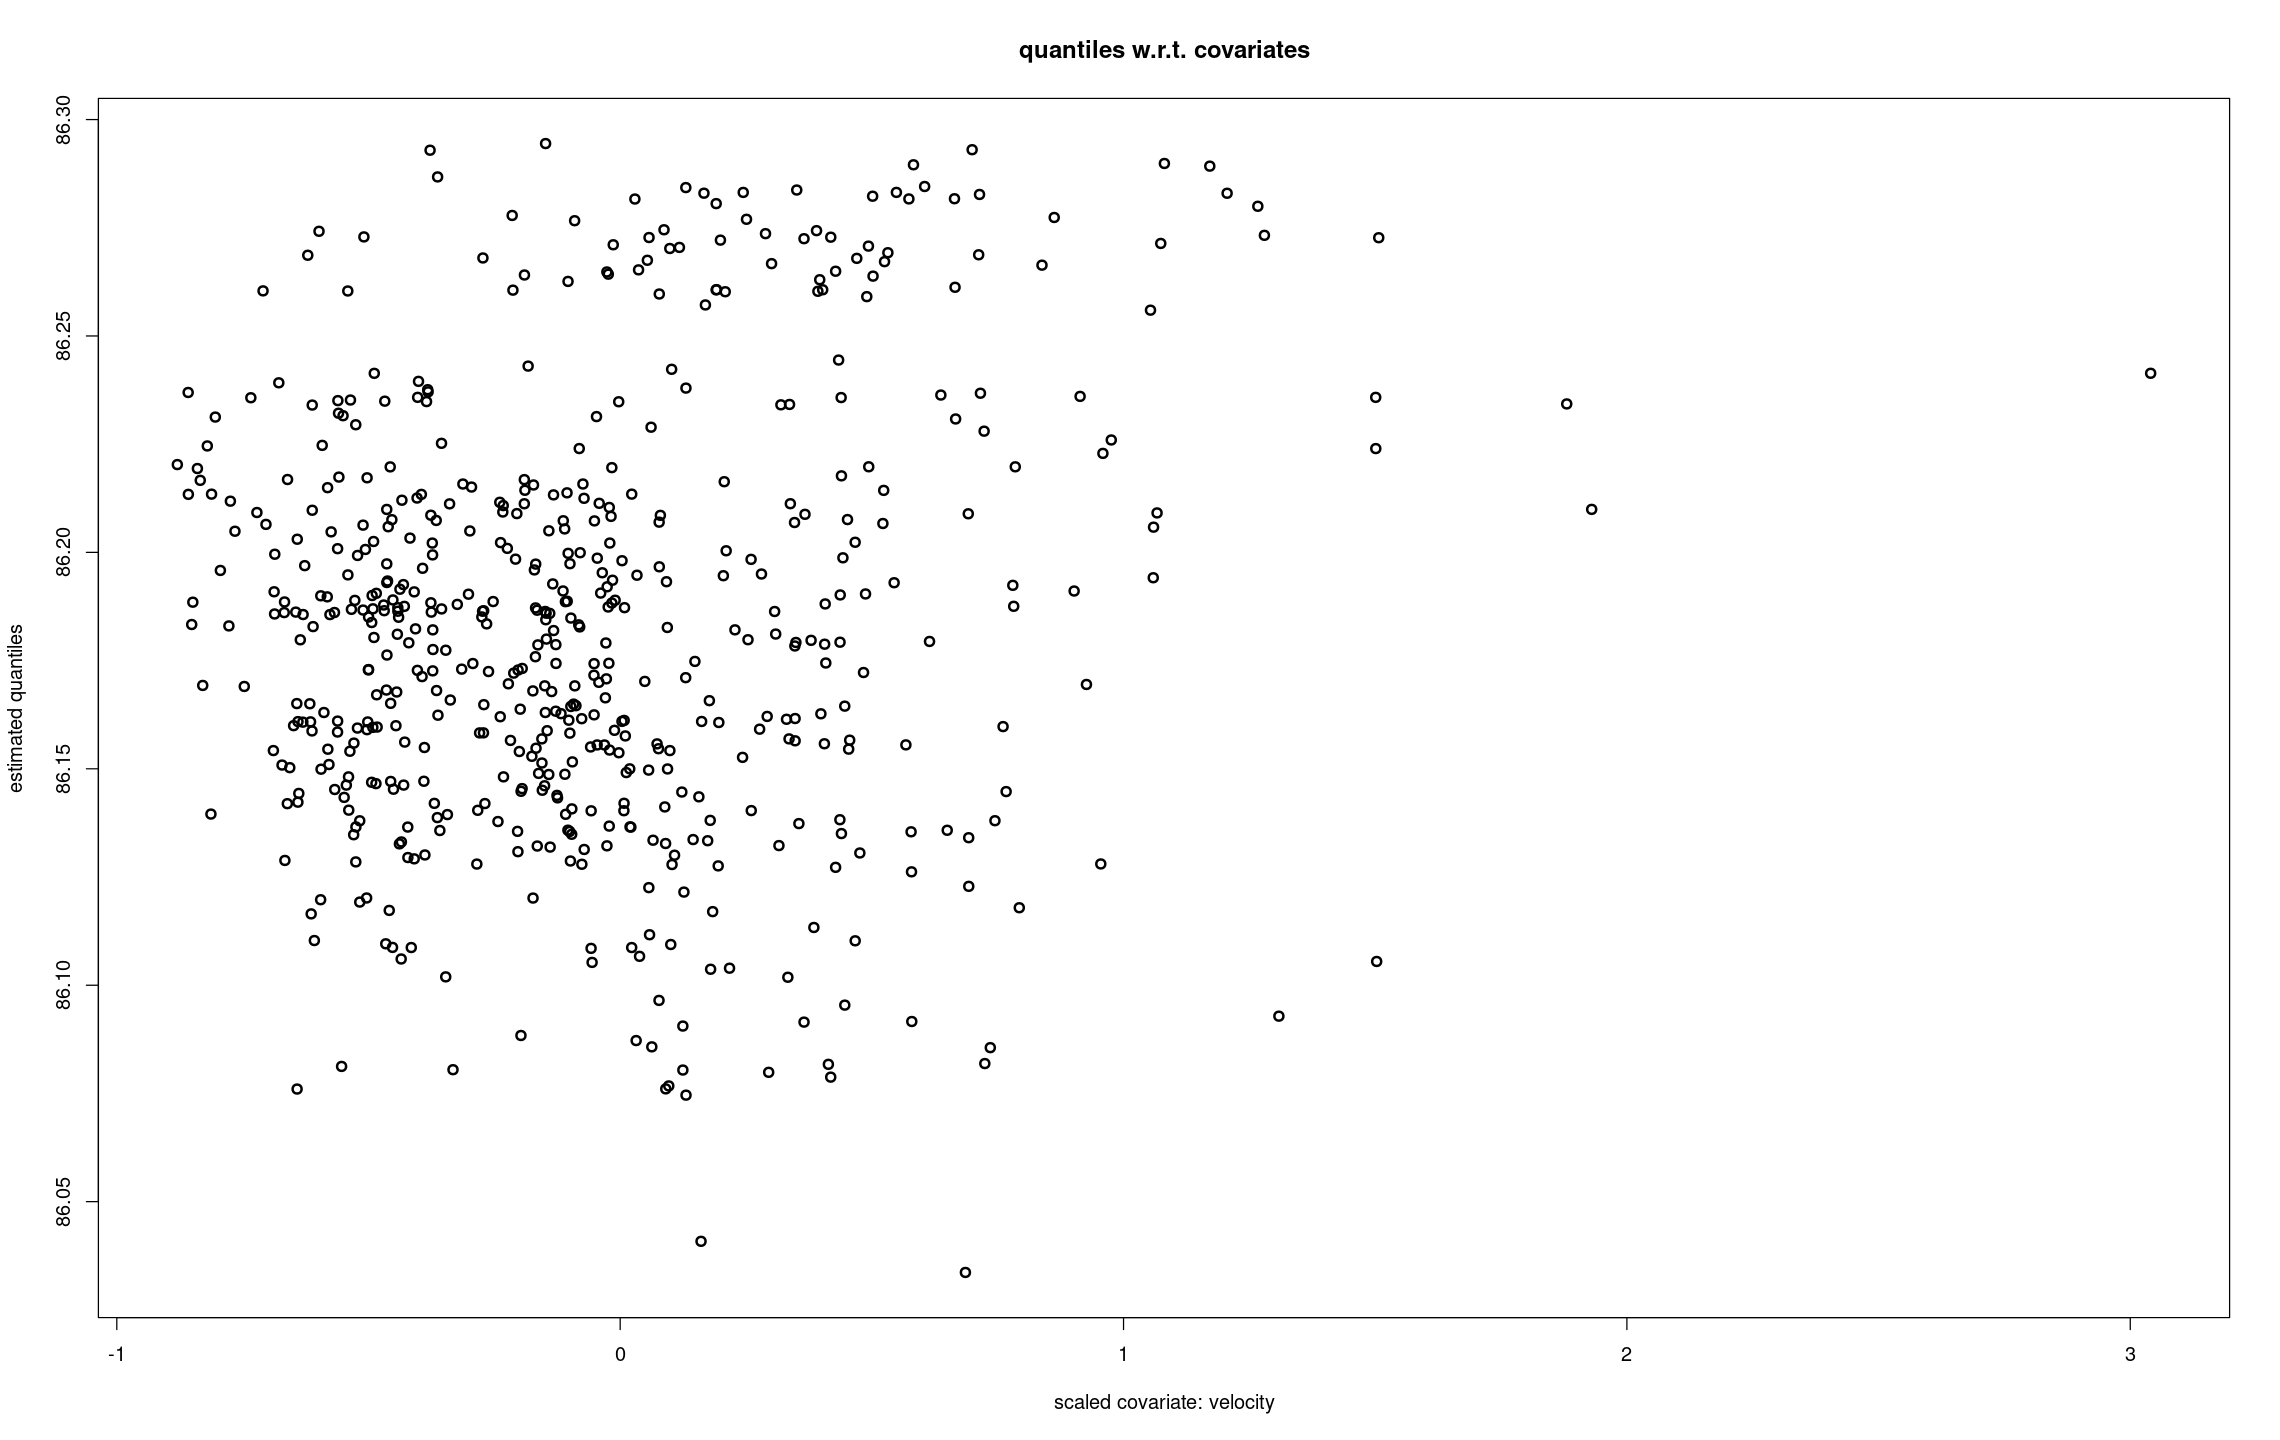

In [58]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = n^(-2)

In [59]:
alpha <- n^(-2)

print(alpha)

[1] 1.915930076e-09


In [60]:

quantiles_2 <- sapply(1:nrow(partial_data_covariates), function(index){
    new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [61]:
tail(quantiles_2)

[1] 10917.60368 10917.60476 10917.60110 10917.60495 10917.57272 10917.57181

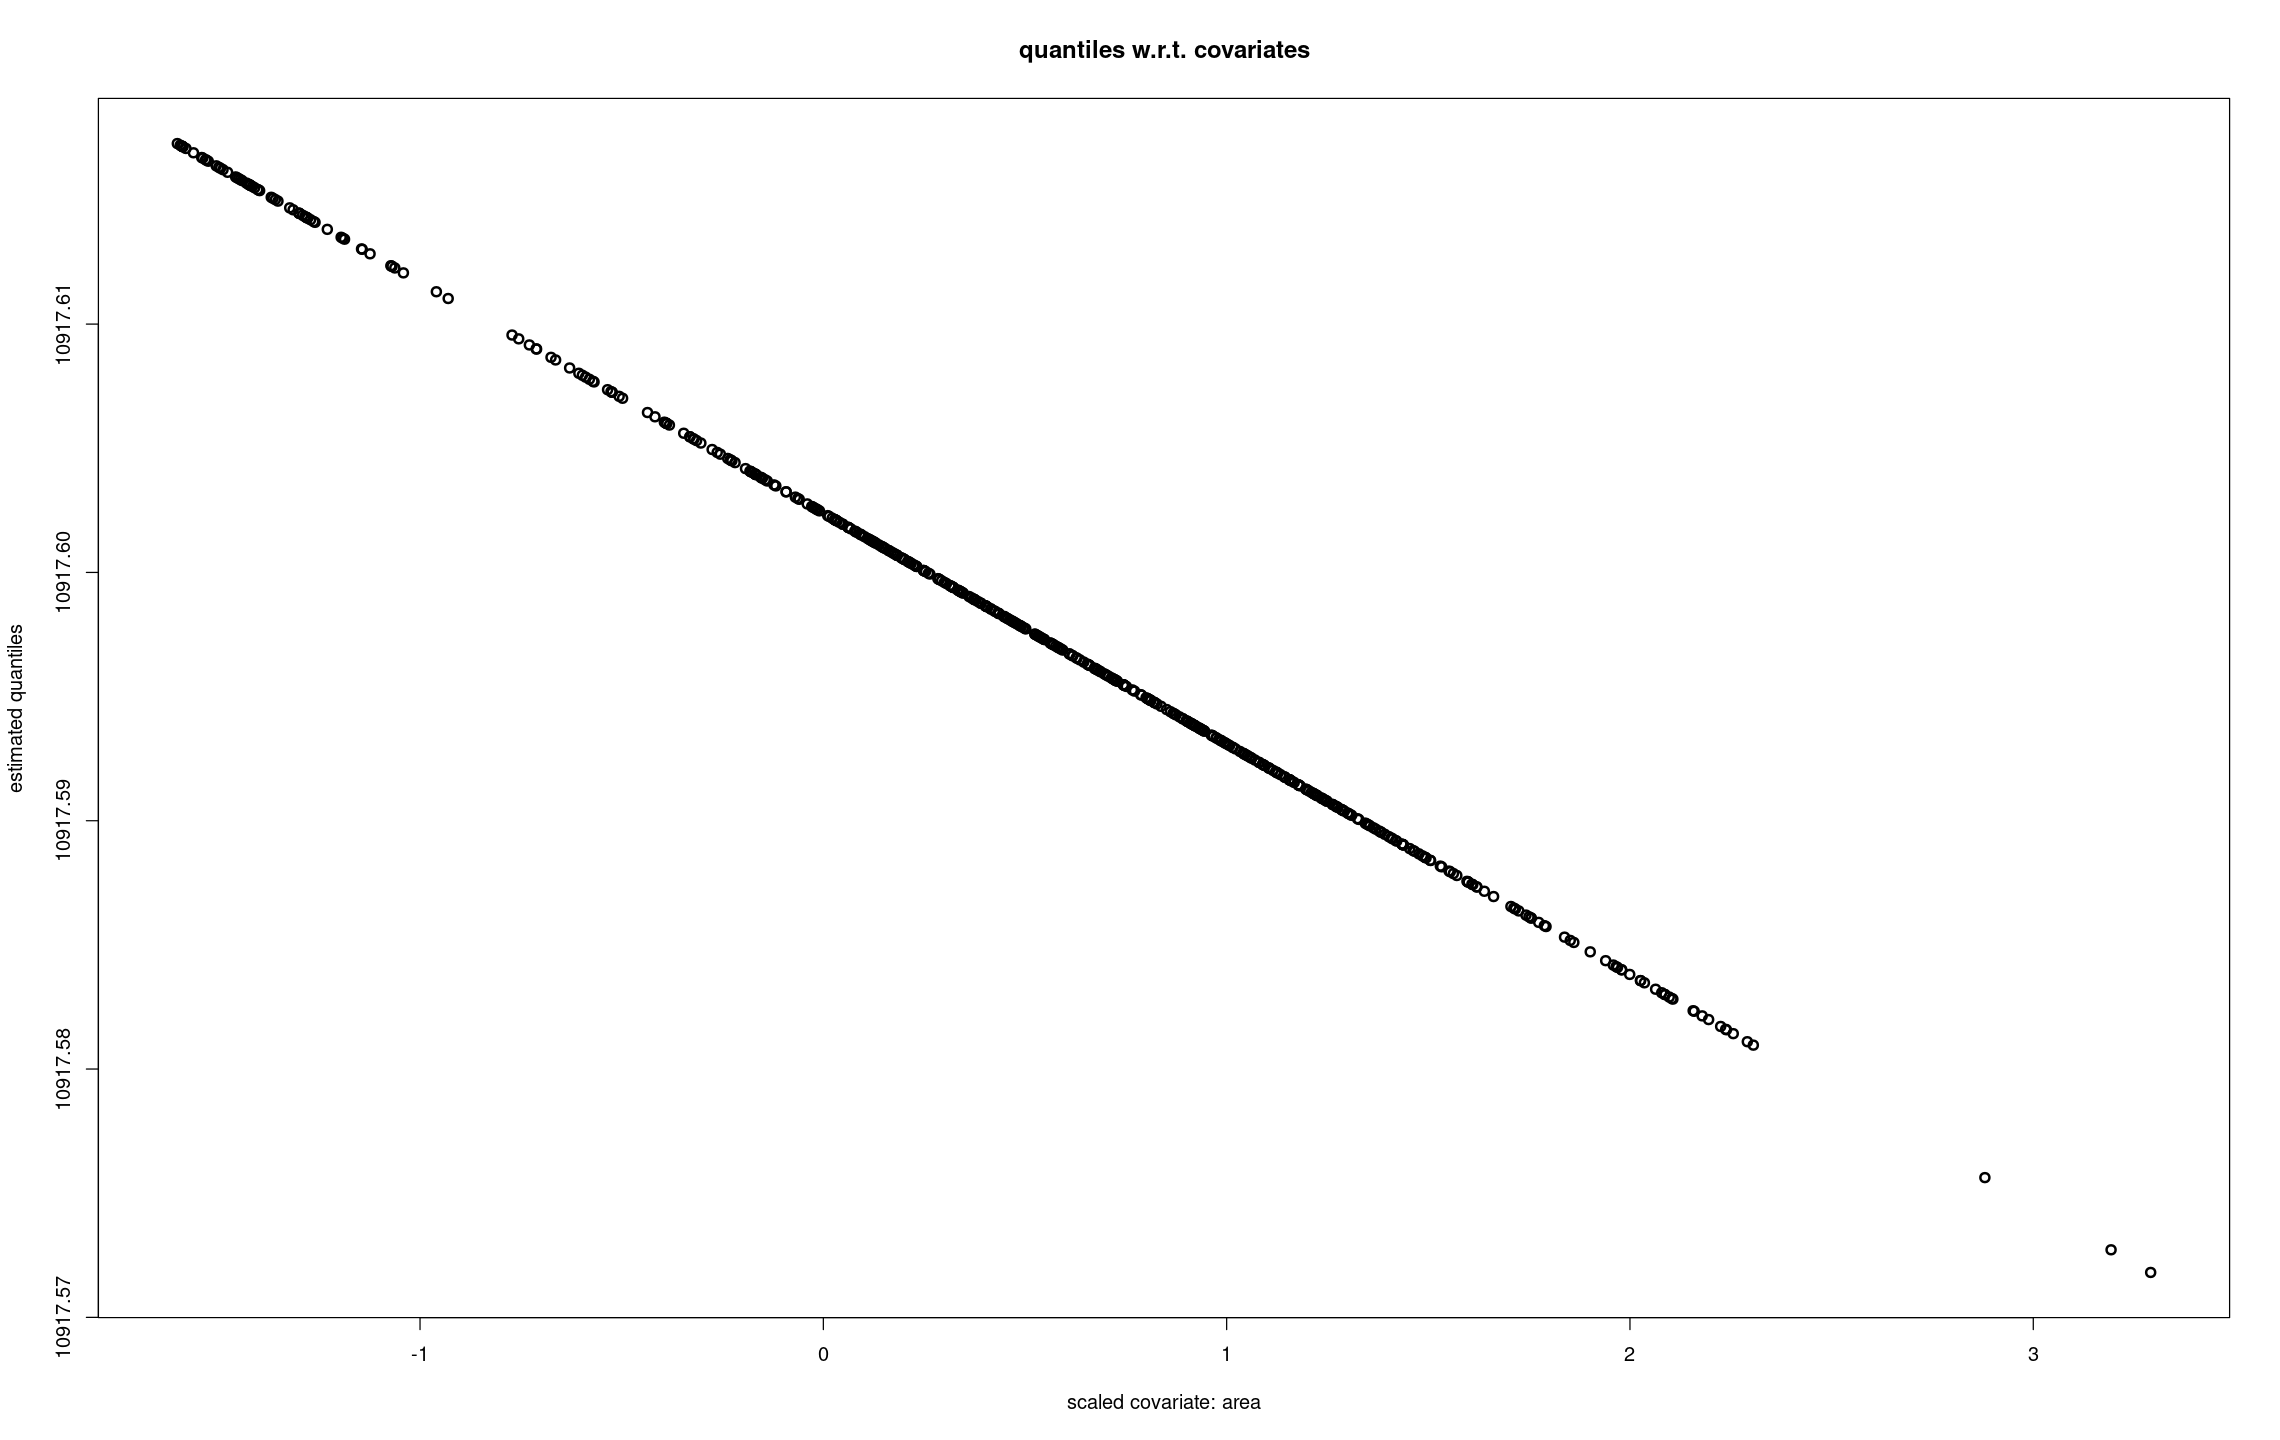

In [62]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

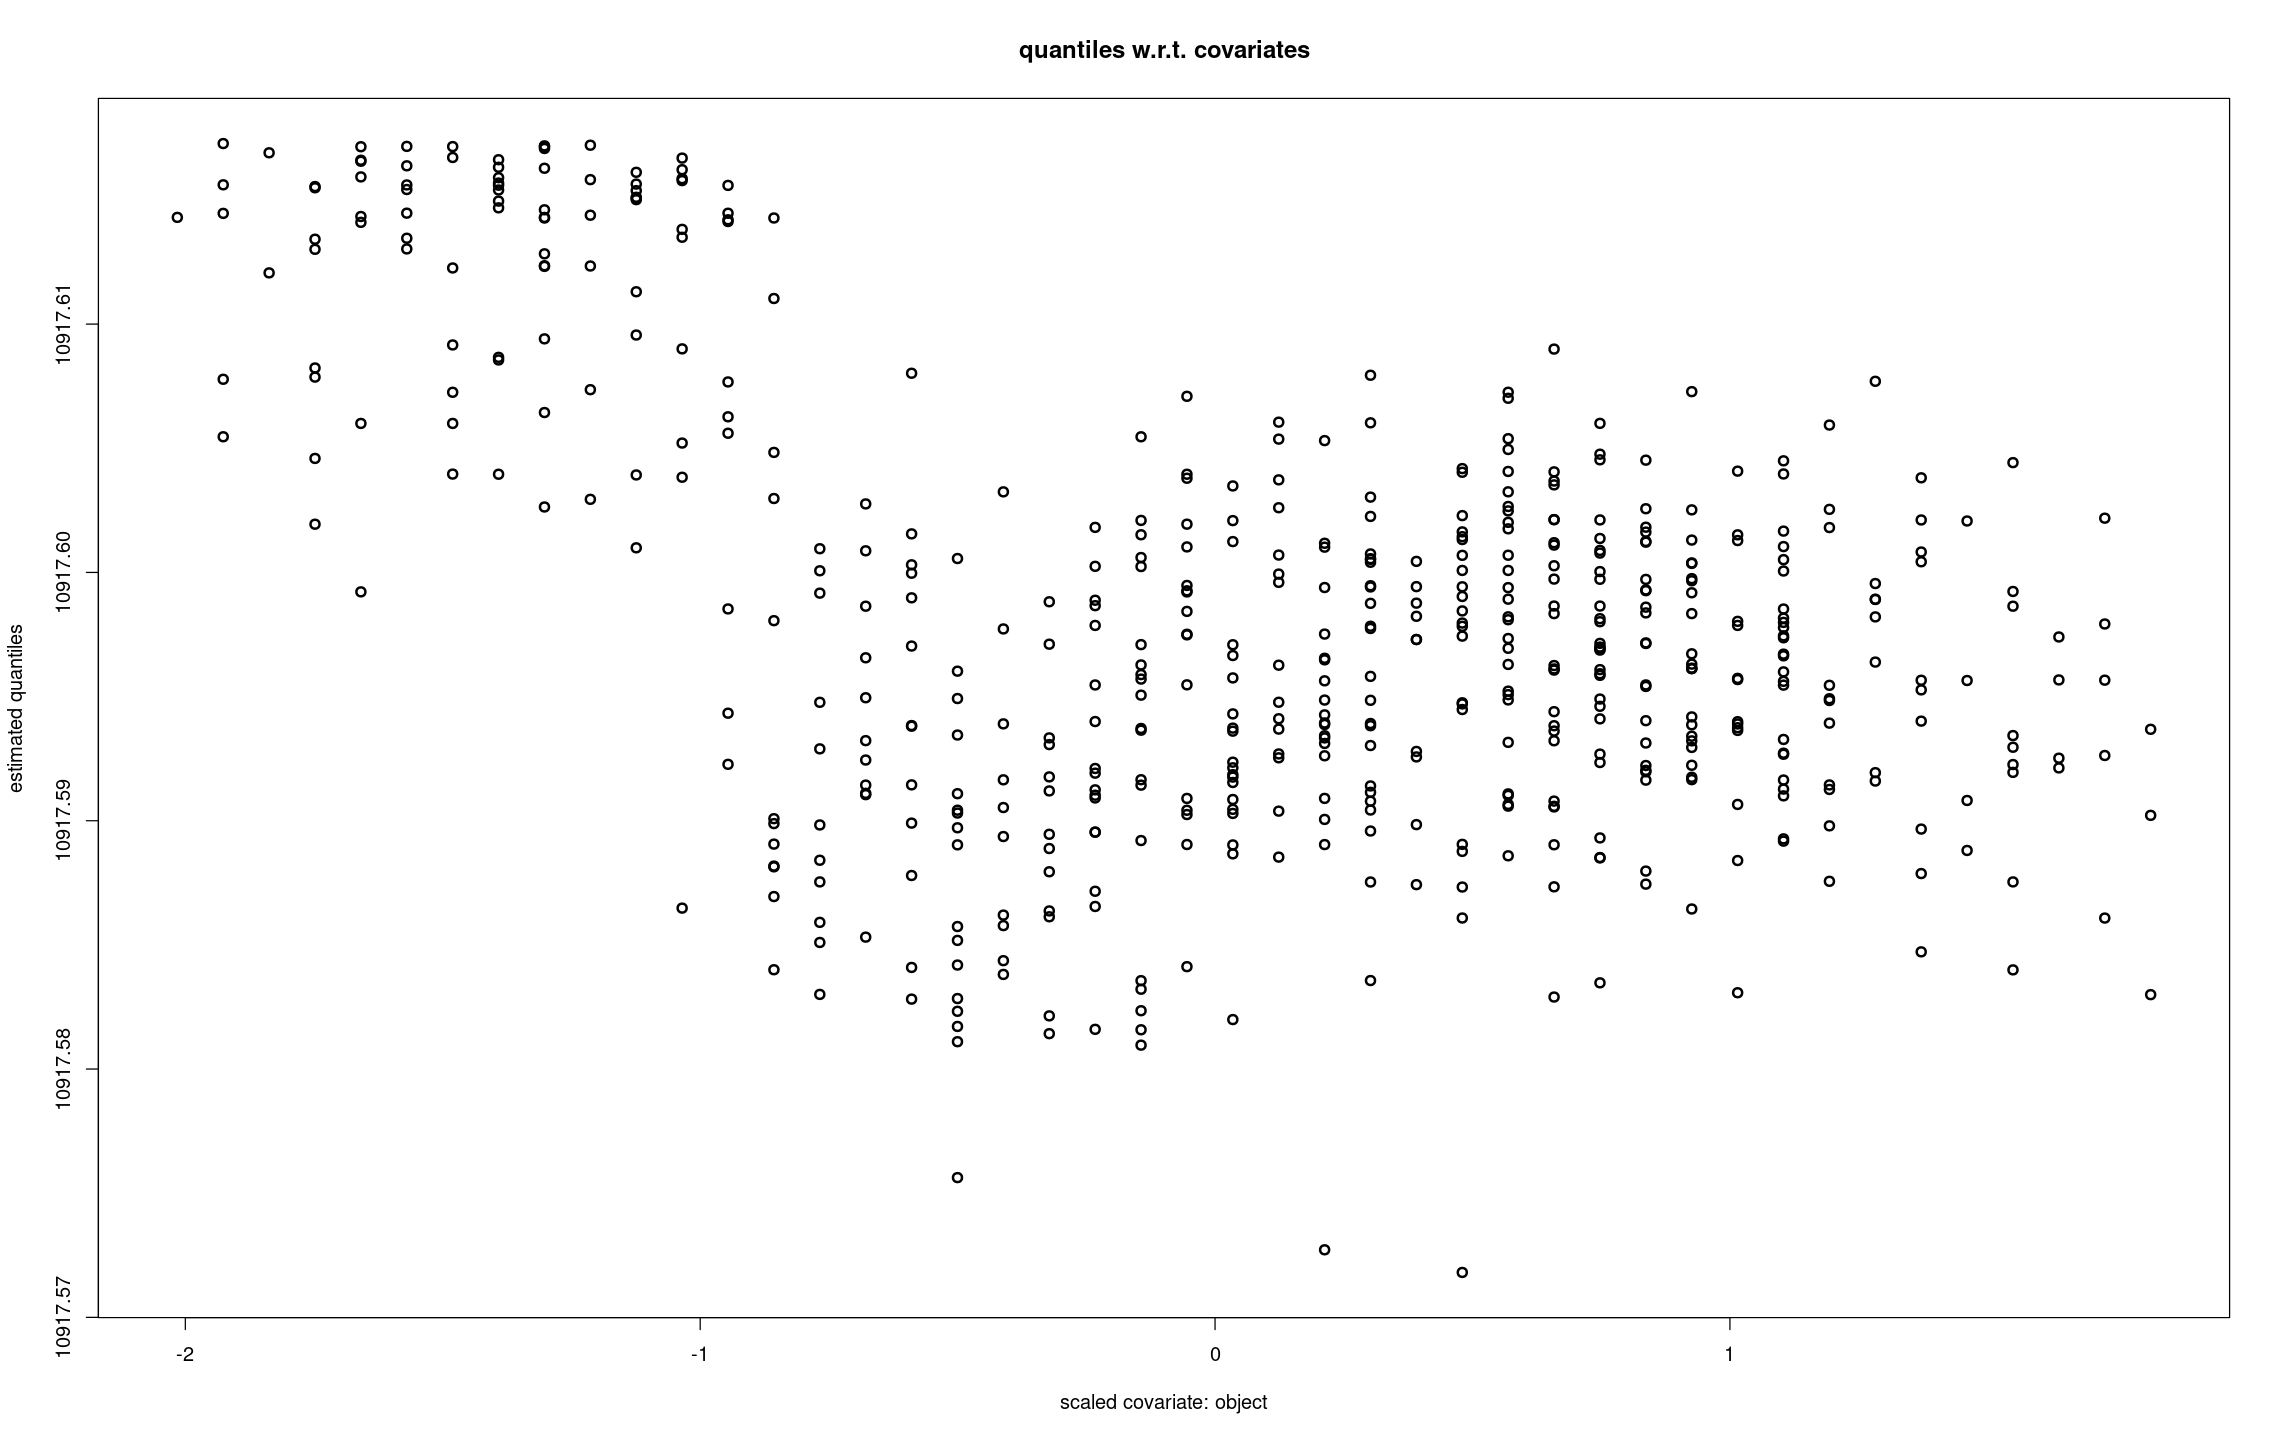

In [63]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

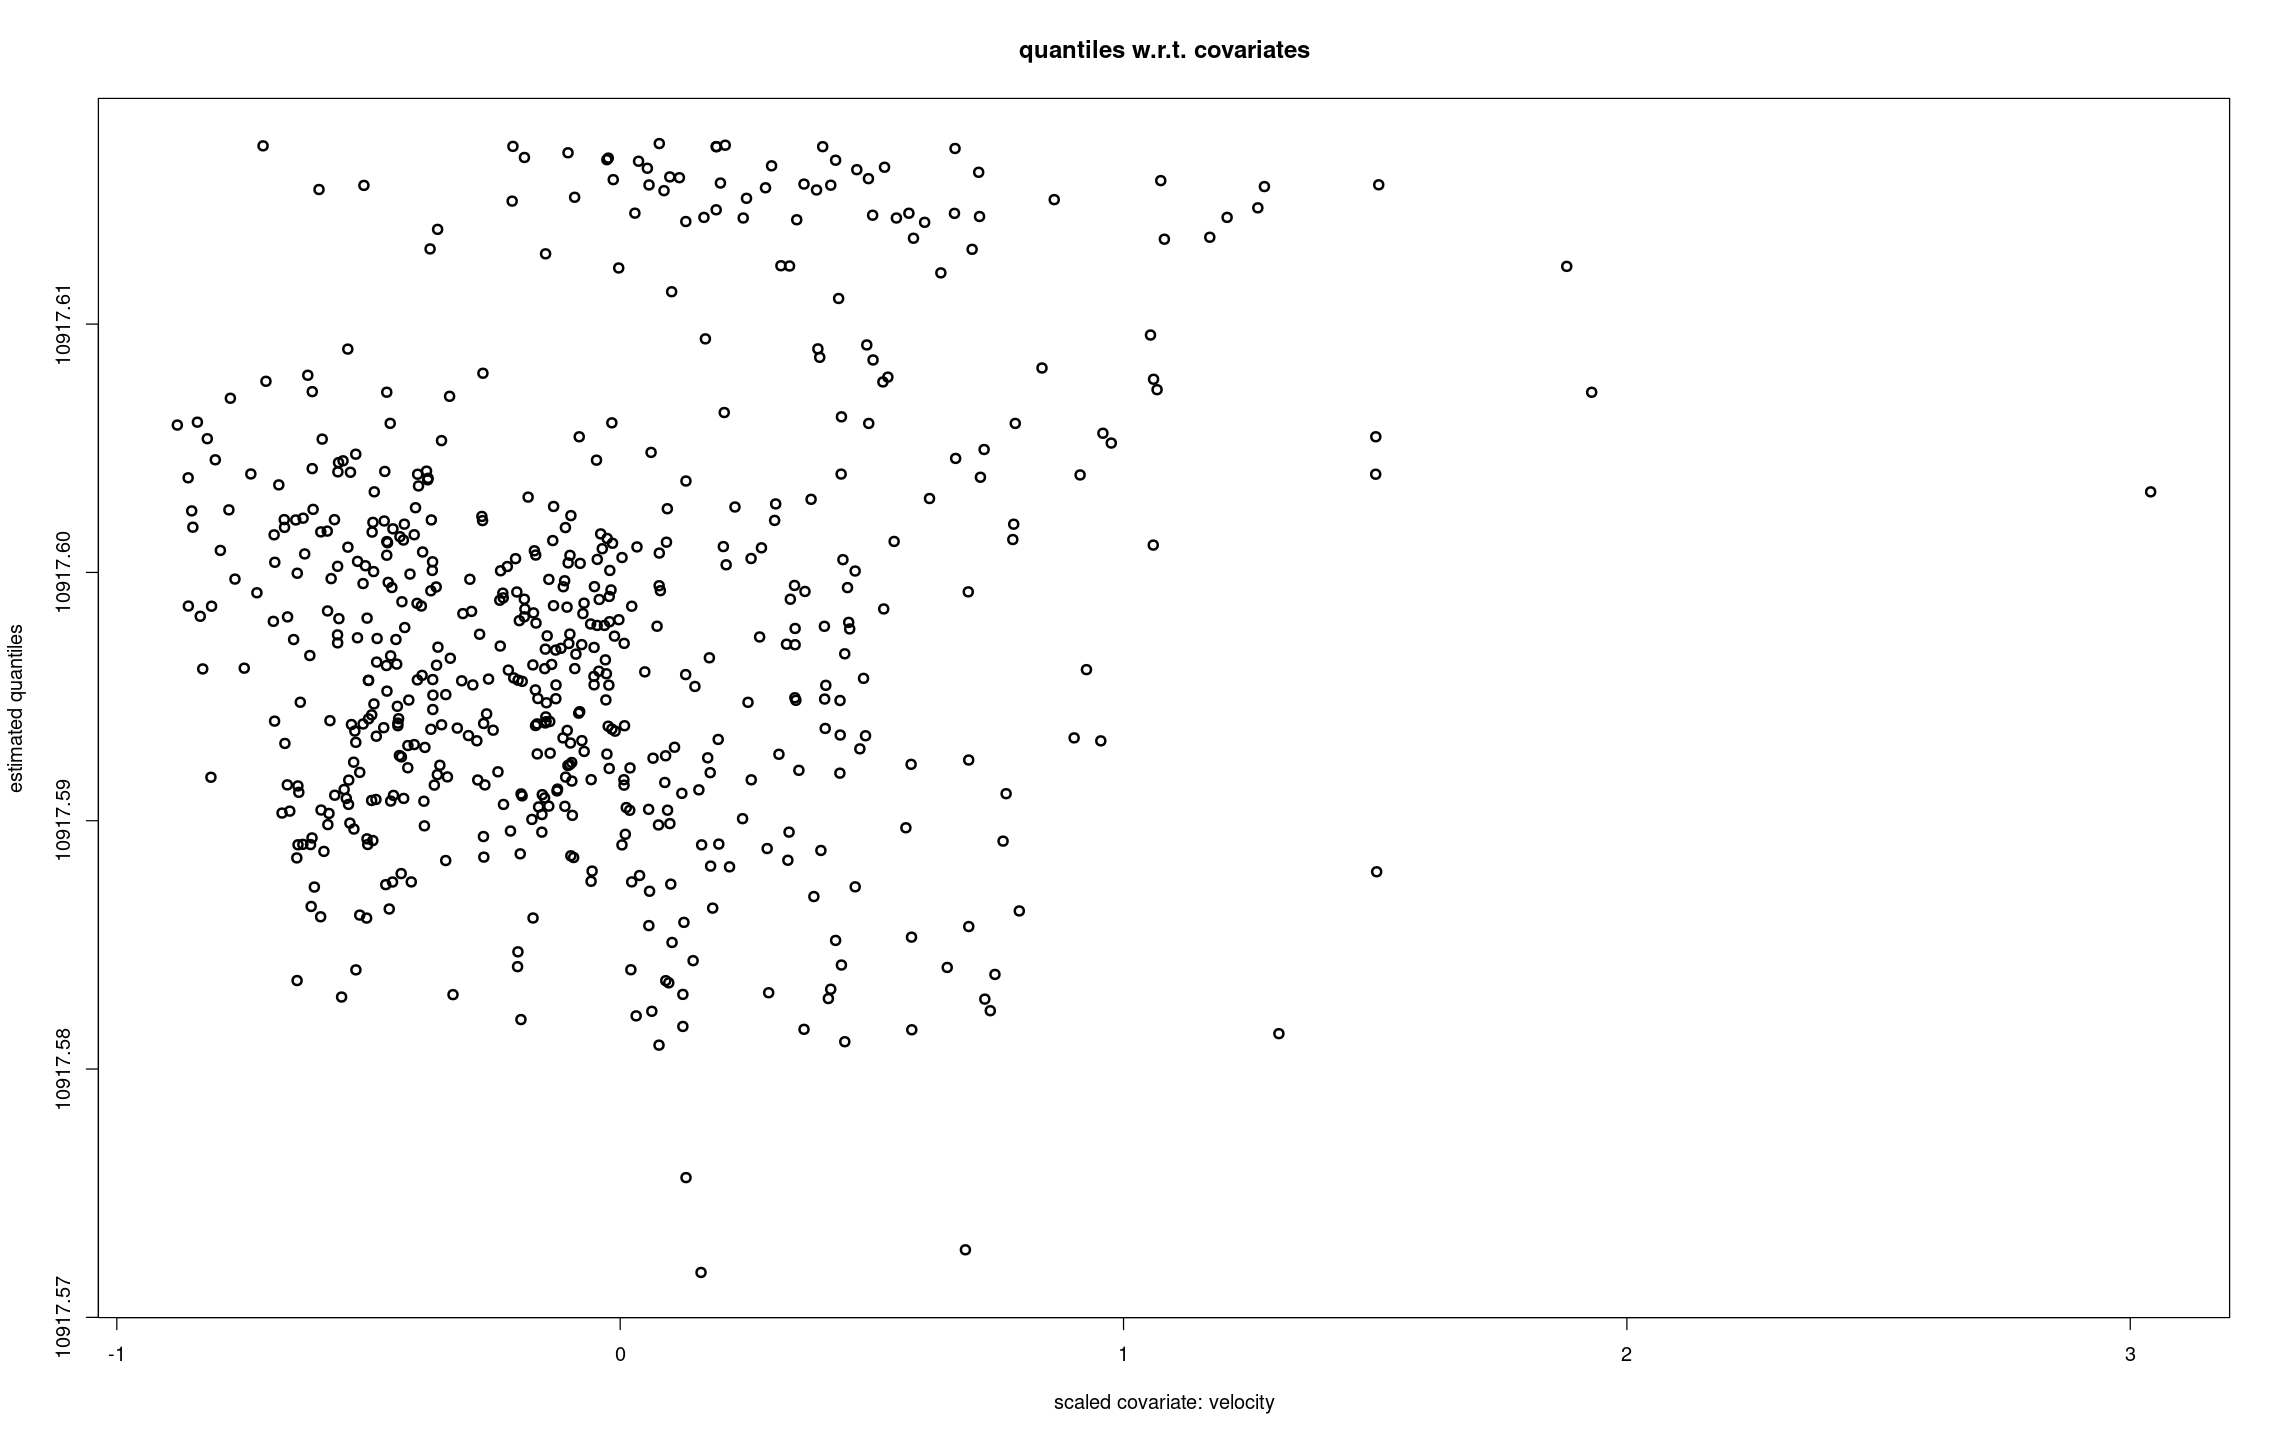

In [64]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = 10^(-6)

In [65]:
alpha <- 10^(-6)

print(alpha)

[1] 1e-06


In [66]:
true_quantile <- NULL

print(true_quantile)

NULL


In [67]:
0.01*23000

[1] 230

In [68]:
new_data_covariates <- data.frame(velocity = 10^(-12),
                                  object = 0.8,
                                  area = 1)

new_data_covariates

velocity,object,area
<dbl>,<dbl>,<dbl>
1e-12,0.8,1


In [69]:
new_data_covariates_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = new_data_covariates)

new_data_covariates_scaled

velocity,object,area
<dbl>,<dbl>,<dbl>
-1.613184706,-2.924681177,0.2472032662


In [70]:
index <- which.max(x)

new_data_covariates <- dplyr::slice(data_covariates_clean, index)

new_data_covariates

velocity,object,area
<dbl>,<dbl>,<dbl>
8.658947144e-11,21,0.4669624901


In [71]:
index <- which.max(x)

new_data_covariates_scaled <- dplyr::slice(data_covariates_clean_scaled, index)

# new_data_covariates_scaled <- dplyr::slice(ns_gev_mixture_model_object$all_data_covariates, index)

new_data_covariates_scaled

velocity,object,area
<dbl>,<dbl>,<dbl>
0.2509946758,-1.124193718,-1.364458149


In [72]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = new_data_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

,location,scale,shape
,<dbl>,<dbl>,<dbl>
3,1.4697329297,0.7665632987,0.4527935893
5,1.2544336901,0.6687760514,0.4541645687
6,1.3156643798,0.6970682342,0.4550978265
7,1.2269188500,0.6571580350,0.4561166291
9,1.1383324214,0.6187343893,0.4576621636
20,0.9387067333,0.5273097322,0.4566670825
24,0.8614444690,0.4879815174,0.4476708851
26,0.8259603174,0.4695955154,0.4442935762
31,0.7731819459,0.4503178938,0.4469800423


In [73]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = TRUE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,611.37673221,881.70936894,1152.0420057
5,471.22301385,781.50270809,1091.7824023
6,463.53109727,823.75237061,1183.9736440
7,416.29726505,785.54740077,1154.7975365
9,346.38863149,754.06954141,1161.7504513
20,130.21252229,633.55183521,1136.8911481
24,82.51717699,528.73806041,974.9589438
26,57.31374238,489.38225180,921.4507612
31,19.15167534,484.08942755,949.0271798


In [74]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = new_data_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,611.37673221,881.70936894,1152.0420057
5,471.22301385,781.50270809,1091.7824023
6,463.53109727,823.75237061,1183.9736440
7,416.29726505,785.54740077,1154.7975365
9,346.38863149,754.06954141,1161.7504513
20,130.21252229,633.55183521,1136.8911481
24,82.51717699,528.73806041,974.9589438
26,57.31374238,489.38225180,921.4507612
31,19.15167534,484.08942755,949.0271798


In [75]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = new_data_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,611.37673221,881.70936894,1152.0420057
5,471.22301385,781.50270809,1091.7824023
6,463.53109727,823.75237061,1183.9736440
7,416.29726505,785.54740077,1154.7975365
9,346.38863149,754.06954141,1161.7504513
20,130.21252229,633.55183521,1136.8911481
24,82.51717699,528.73806041,974.9589438
26,57.31374238,489.38225180,921.4507612
31,19.15167534,484.08942755,949.0271798


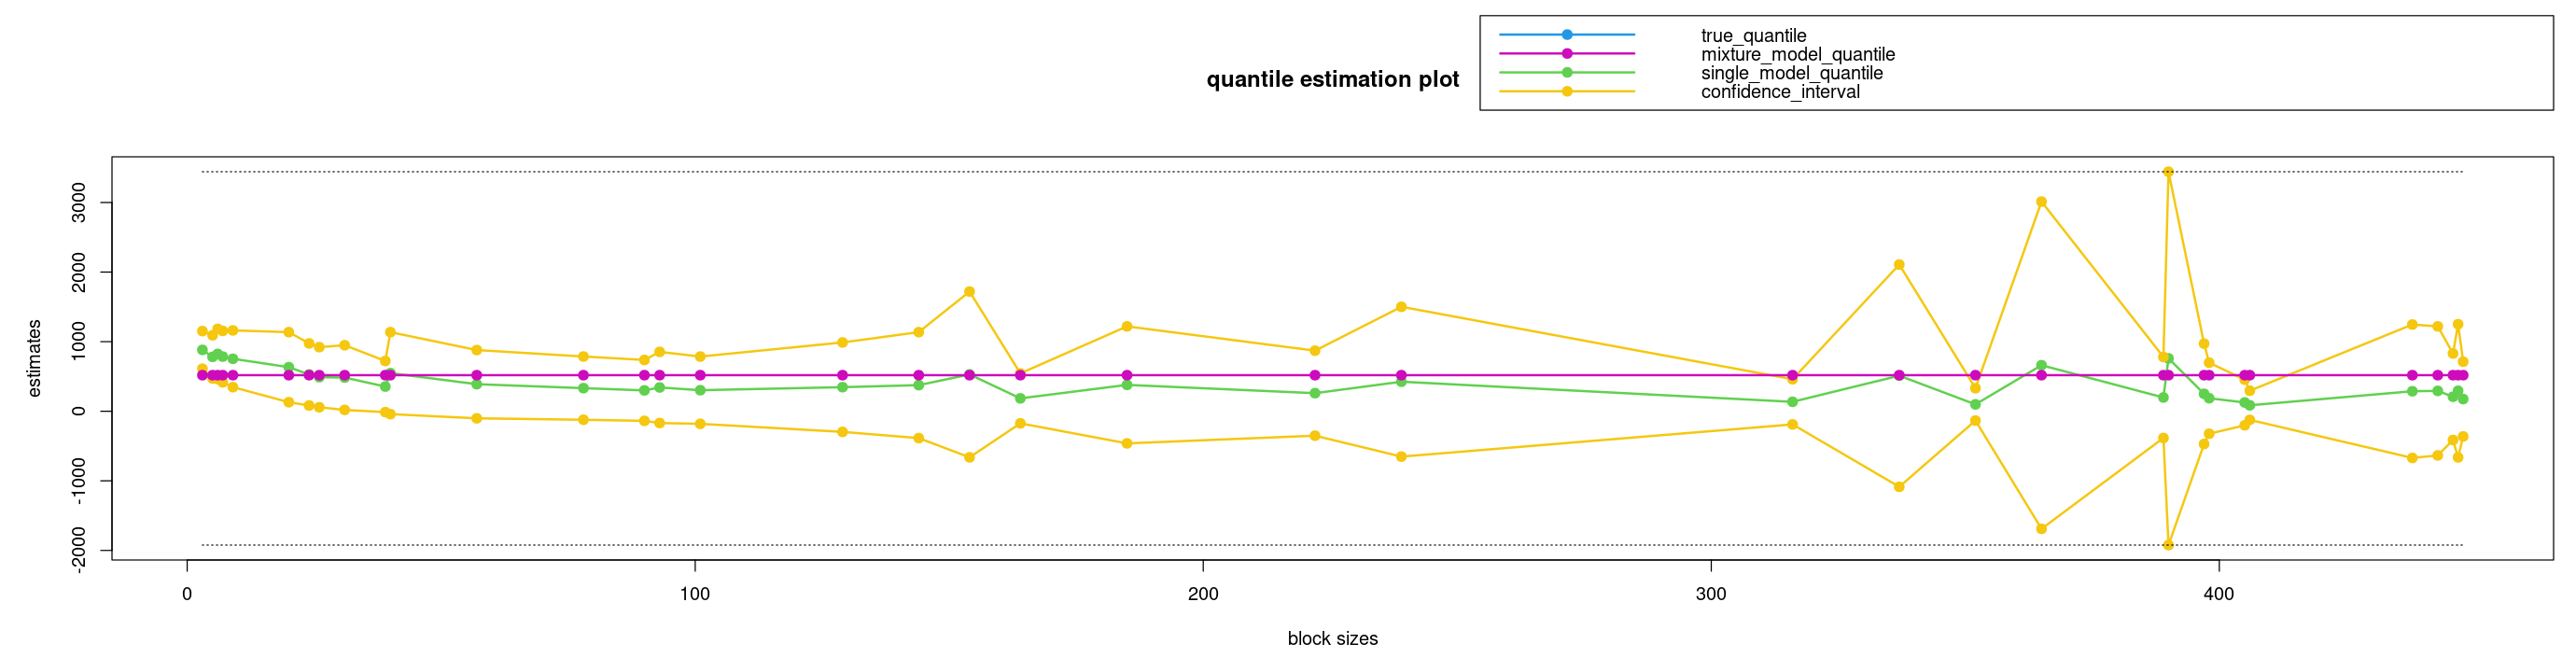

In [76]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = NULL,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = TRUE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")
